
##**Proyek Akhir KASDD**

<h2 align="center"><strong>Kafka</strong></h2>

<h3 align="center"><strong>Dataset: Cycling Segments Leaderboard (CSL)</strong></h3>

<p align="center">
Shirin Zarqaa Rabbaanii Arham<br>
2206081963
</p>

# Deskripsi Dataset dan Preprocessing

Dataset mencakup berbagai informasi, seperti:<br>
* **user_age_group:** Grup usia peserta
* **user_weight_category:** Grup berat badan peserta
* **user_id:** User ID
* **attempt_date:** Tanggal log bersepeda
* **gender:** Jenis kelamin peserta
* **smt_rank:** Rank peserta di suatu segmen dan gender
* **smt_avg_spd:** Kecepatan rata-rata peserta di suatu segmen (lintasan) dalam km/jam
* **smt_finish_seconds:** Waktu yang dibutuhkan peserta untuk menyelesaikan suatu segmen (lintasan) dalam detik
* **smt_name:** Nama segmen (lintasan)
* **act_title:** Judul log aktivitas bersepeda
* **act_avg_spd:** Kecepatan rata-rata peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_max_spd:** Kecepatan maksimum peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_total_km:** Total jarak yang ditempuh peserta di suatu log (sepanjang segmen + di luar segmen) dalam km
* **act_moving_seconds:** Total waktu bersepeda peserta di suatu log (sepanjang segmen + di luar segmen) dalam detik
* **act_total_seconds:** Total waktu suatu log (sepanjang segmen + di luar segmen) dalam detik
* **has_hr_data:** Ada atau tidaknya data detak jantung di log tersebut

In [309]:
!pip install pandas

In [310]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualisasi
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

from numpy import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [311]:
import warnings
warnings.filterwarnings('ignore')

## Membuat dan Membaca Informasi *Dataframe*

In [312]:
df = pd.read_csv("https://drive.google.com/uc?id=1FUIyjpZSSDVb9QAvHR5Am4v3BxTYQu4x")

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_age_group        6292 non-null   object 
 1   user_id               6292 non-null   int64  
 2   attempt_date          6292 non-null   object 
 3   gender                6292 non-null   object 
 4   smt_rank              6292 non-null   int64  
 5   smt_avg_spd           6292 non-null   float64
 6   smt_finish_seconds    6292 non-null   int64  
 7   smt_name              6292 non-null   object 
 8   user_weight_category  5932 non-null   object 
 9   act_title             6292 non-null   object 
 10  act_avg_spd           6292 non-null   float64
 11  act_max_spd           6292 non-null   float64
 12  act_total_km          6292 non-null   float64
 13  act_moving_seconds    6292 non-null   int64  
 14  act_total_seconds     6292 non-null   int64  
 15  has_hr_data          

In [314]:
df.head()

,user_age_group,user_id,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
0,25 to 34,1972,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0,6977
1,25 to 34,239,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0,3518
2,25 to 34,405,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0,415
3,25 to 34,318,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1,1755
4,25 to 34,628,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0,7088


In [315]:
df.describe()

,user_id,smt_rank,smt_avg_spd,smt_finish_seconds,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
count,6292.000000,6292.000000,6292.00000,6292.000000,6292.000000,6292.000000,6292.000000,6.292000e+03,6.292000e+03,6292.000000,6292.000000
mean,782.421964,172.515893,26.80925,531.276224,22.681024,44.757533,42.147134,1.252379e+04,1.252379e+04,0.196440,3947.028608
std,539.051866,173.487689,8.44806,431.974886,5.851547,17.055338,27.010789,2.157781e+05,2.157781e+05,0.397337,2261.820409
min,2.000000,1.000000,0.80000,112.000000,0.000000,8.600000,2.280000,2.640000e+02,2.640000e+02,0.000000,1.000000
25%,335.000000,37.000000,21.30000,266.000000,18.700000,36.700000,23.440000,4.095000e+03,4.095000e+03,0.000000,2004.750000
50%,703.500000,108.000000,26.50000,439.000000,22.100000,42.100000,37.780000,5.781500e+03,5.781500e+03,0.000000,3941.000000
75%,1096.000000,267.000000,32.50000,651.000000,26.400000,48.600000,52.140000,8.098500e+03,8.098500e+03,0.000000,5907.250000
max,2254.000000,805.000000,87.30000,9224.000000,75.200000,690.800000,706.590000,1.167978e+07,1.167978e+07,1.000000,7863.000000


## Handle *Missing Values*

In [316]:
df.isnull().sum()

,0
user_age_group,0
user_id,0
attempt_date,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,360
act_title,0


In [317]:
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                      Total   Percent
user_weight_category    360  0.057216


In [318]:
df[df.isna().any(axis=1)]

,user_age_group,user_id,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data,id
18,25 to 34,222,2019-10-23,male,76,33.2,512,King Street side,NaN,Evening Ride,27.6,45.7,40.23,5253,5253,0,2057
54,25 to 34,320,2018-01-13,male,286,24.1,250,Headquarters Business Park,NaN,Evening Ride,20.7,34.6,14.11,2451,2451,0,6552
69,35 to 44,824,2019-09-16,male,254,28.2,254,Oghor 2 SailsIsland,NaN,Evening Ride,23.2,36.4,50.50,7821,7821,0,4224
71,25 to 34,1925,2019-12-09,male,624,18.2,332,Headquarters Business Park,NaN,Afternoon Ride,17.3,43.6,17.44,3640,3640,0,6888
80,25 to 34,222,2019-12-16,male,82,23.4,1361,S.Ubhur Alkurnaysh South Bound with detour,NaN,الجوهرة,27.5,46.4,53.37,6987,6987,0,1226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,25 to 34,369,2016-11-23,male,227,24.9,565,Starbucks to Majid,NaN,Pedalada de mañana,29.6,44.6,36.17,4402,4402,0,379
6200,55 to 64,1275,2020-02-28,male,16,14.2,689,PRINCE SULTAN - ASSALAM TO FATIMA,NaN,Camel Circle Ride V2,18.9,52.2,75.25,14305,14305,0,3073
6232,25 to 34,1486,2018-03-14,male,562,19.4,369,Oghor 2 SailsIsland,NaN,Night Ride,17.9,37.4,10.94,2206,2206,0,3890
6265,25 to 34,1954,2019-07-12,male,685,16.8,359,Headquarters Business Park,NaN,Morning Ride,15.7,31.0,12.87,2961,2961,0,6949


In [319]:
df_clean = df.copy()

In [320]:
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [321]:
df_clean['user_weight_category'] = fill_null_mode(df_clean['user_weight_category'])

In [322]:
df_clean.isnull().sum()

,0
user_age_group,0
user_id,0
attempt_date,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,0
act_title,0


Berdasarkan proporsi missing values 5.72% dilakukan pendekatan imputasi menggunakan mode pada fitur `user_weight_category` karena fitur ini merupakan data categorical sehingga mengisi nilai kosong dengan mode dapat menjaga distribusi data tetap konsisten tanpa penambahan bias signifikan. Selain itu, tidak dilakukannya penghapusan baris karena akan dapat mengurangi jumlah data secara keseluruhan dan dapat menyebabkan kehilangan informasi penting.

Referensi:
* [Teknik Pengolahan Data](https://dqlab.id/digital-transformation-pahami-teknik-pengolahan-ini-dalam-industri-data)

## Handle duplicate data

In [323]:
duplicate_rows = df_clean[df_clean.duplicated()]
duplicate_total_rows, duplicate_total_attributes = duplicate_rows.shape
print('jumlah data duplicate: ', duplicate_total_rows)

jumlah data duplicate:  0


In [324]:
df_clean.drop(["id", "user_id"], axis = 1, inplace=True)

Pada proses ini, tidak diperlukan langkah tambahan untuk menangani duplikasi data, karena dataset yang digunakan telah dipastikan bebas dari data yang duplikat. Hal ini berarti setiap baris data bersifat unik, sehingga tidak ada risiko redundansi yang dapat memengaruhi analisis atau hasil prediksi.

Referensi:
* [Data Preprocessing — Handling Duplicate Values and Outliers in a dataset](https://medium.com/@ayushmandurgapal/handling-dPada%20proses%20ini,%20tidak%20diperlukan%20langkah%20tambahan%20untuk%20menangani%20duplikasi%20data,%20karena%20dataset%20yang%20digunakan%20telah%20dipastikan%20bebas%20dari%20data%20yang%20duplikat.%20Hal%20ini%20berarti%20setiap%20baris%20data%20bersifat%20unik,%20sehingga%20tidak%20ada%20risiko%20redundansi%20yang%20dapat%20memengaruhi%20analisis%20atau%20hasil%20prediksi.uplicate-values-and-outliers-in-a-dataset-b00ce130818e)

## Handle Outlier

In [325]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [326]:
hitung_outlier(df_clean)

,smt_rank,smt_avg_spd,smt_finish_seconds,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
Outliers count,163.000000,53.000000,288.000000,94.000000,375.000000,308.000000,296.000000,296.000000,1236.000000
Outliers percentage (%),2.590591,0.842339,4.577241,1.493961,5.959949,4.895105,4.704387,4.704387,19.643992


<Axes: >

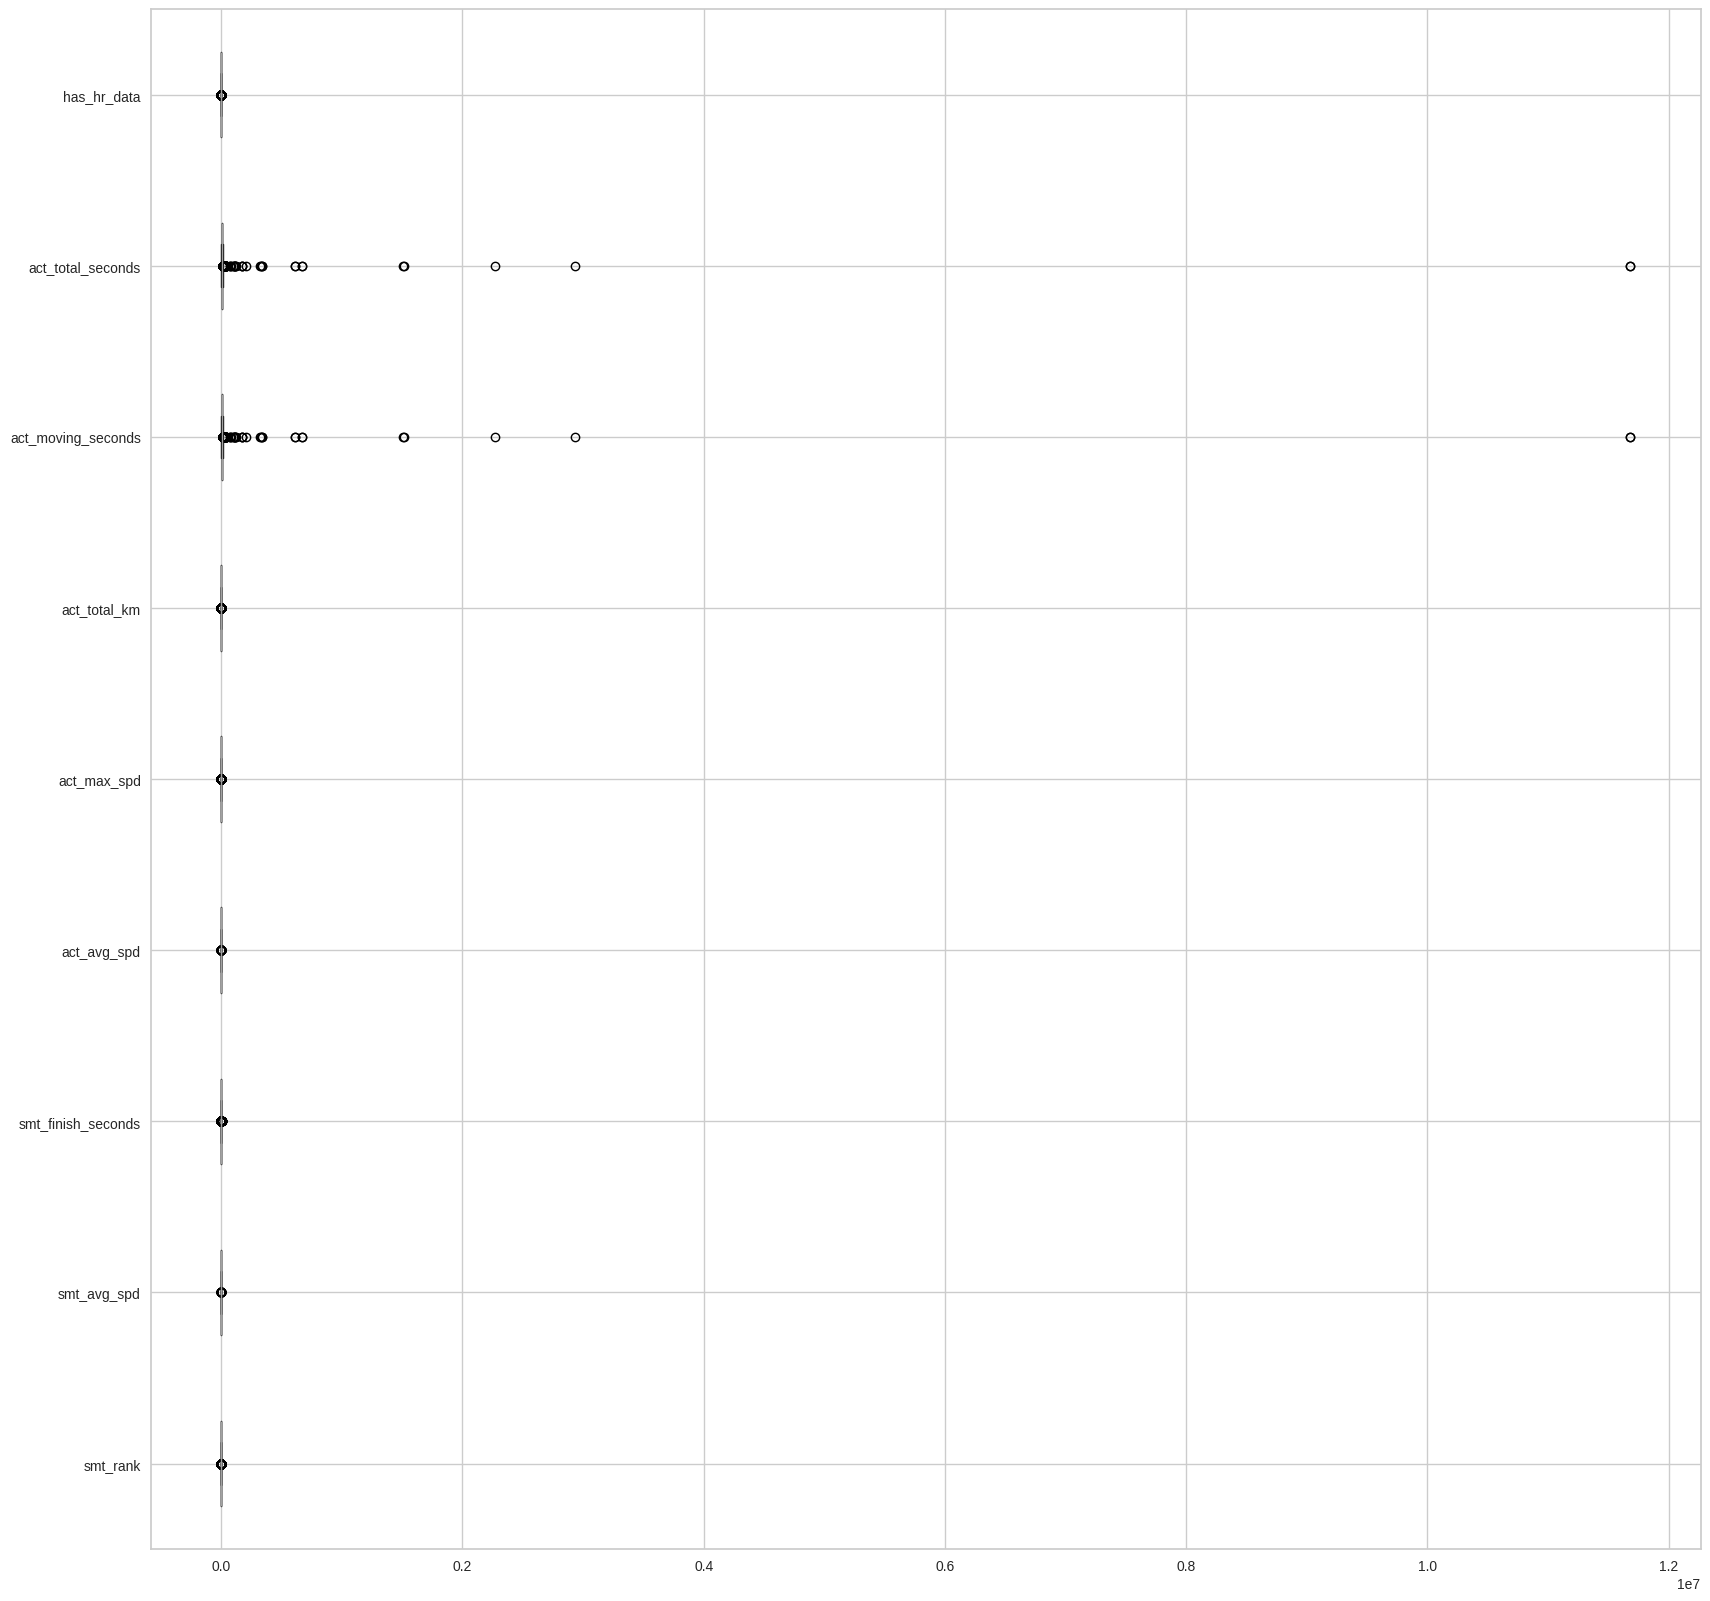

In [327]:
df_clean.boxplot(vert=False, figsize=(20,20))

Pada tahap ini, analisis outlier dilakukan menggunakan visualisasi boxplot untuk mengidentifikasi data yang memiliki outlier ekstrem. Dari visualisasi tersebut, terlihat beberapa atribut yang mengandung outlier ekstrem. Namun, kami memutuskan untuk tidak menangani outlier tersebut karena analisis kami menyimpulkan bahwa nilai-nilai outlier tersebut dapat diterima sebagai representasi kondisi nyata yang mungkin terjadi. Oleh karena itu, pada kasus ini menghilangkan atau mengubah outlier tersebut berpotensi menghilangkan informasi penting yang relevan dengan analisis atau model.

Referensi:   
* [cara mendeteksi outlier](https://blog.algorit.ma/cara-mendeteksi-outlier/)

# Exploratory Data Analysis

## Perbedaan performa bersepeda antara laki-laki dan perempuan pada segment yang sama

#### Pemilihan Attribut yang relevan

Berikut adalah penjelasan mengenai alasan pemilihan setiap fitur untuk menganalisis perbedaan performa bersepeda antara laki-laki dan perempuan:  

1. **`gender`**  
   - Atribut ini digunakan untuk memisahkan data berdasarkan jenis kelamin (laki-laki dan perempuan). Dengan atribut ini, performa dapat dibandingkan antara kedua kelompok gender untuk setiap segmen.

2. **`smt_name`**  
   - Atribut ini diperlukan untuk memastikan bahwa perbandingan performa dilakukan di lintasan yang sama. Hal ini diperlukan agar proses analisis di ukur pada saat menghadapi tantangan yang setara di segmen tersebut.

3. **`smt_avg_spd`**  
   - Kecepatan rata-rata peserta pada segmen tertentu memberikan gambaran langsung tentang performa. Fitur ini penting karena kecepatan rata-rata mencerminkan kemampuan peserta untuk mempertahankan kecepatan pada lintasan tertentu, sehingga menjadi indikator utama perbedaan performa fisik antara gender.

4. **`smt_finish_seconds`**  
   - Fitur ini memungkinkan analisis performa berdasarkan waktu yang di perlukan untuk menyelesaikan suatu segmen lintasan.

5. **`smt_rank`**  
   - Rank peserta dalam suatu segmen digunakan untuk melihat posisi relatif laki-laki dan perempuan dibandingkan dengan peserta lainnya di lintasan yang sama. Fitur ini akan memberikan konteks performa, misalnya apakah laki-laki atau perempuan lebih sering berada di posisi atas atau bawah dalam suatu lintasan tertentu.

#### Statistik deskriptif per-segmen

In [328]:
male_segments = df_clean[df_clean['gender'] == 'male'].groupby('smt_name').agg({
    'smt_avg_spd': ['count', 'mean','median','std', 'min', 'max'],
    'smt_finish_seconds': ['mean','median','std', 'min', 'max'],
    'smt_rank': ['mean', 'min', 'max']
}).round(2)

male_segments

smt_avg_spd                      \
                                                 count   mean median   std   
smt_name                                                                     
Al Fardoos to shellfish round about                155  34.21  35.40  6.98   
Headquarters Business Park                        1433  22.67  22.40  6.80   
King Street side                                   576  28.42  28.20  7.56   
North Corniche                                    1018  28.69  29.15  8.08   
Obhur North Short                                  190  25.94  28.20  8.40   
Oghor 2 SailsIsland                               1224  29.59  29.60  8.17   
PRINCE SULTAN - ASSALAM TO FATIMA                  359  30.18  29.70  9.21   
S.Ubhur Alkurnaysh South Bound with detour         249  29.07  29.30  8.78   
Starbucks to Majid                                 835  24.98  24.70  7.78   

                                                      smt_finish_seconds  \
                                            min   max               mean   
smt_name                                                                   
Al Fardoos to shellfish round about         6.6  47.5             862.05   
Headquarters Business Park                  0.8  47.2             311.06   
King Street side                            4.7  71.8             658.62   
North Corniche                              2.7  57.3             686.81   
Obhur North Short                           2.7  39.0            1179.12   
Oghor 2 SailsIsland                         3.2  63.5             271.27   
PRINCE SULTAN - ASSALAM TO FATIMA           4.7  87.3             361.33   
S.Ubhur Alkurnaysh South Bound with detour  7.8  45.6            1234.01   
Starbucks to Majid                          2.5  69.4             639.13   

                                                                       \
                                            median     std  min   max   
smt_name                                                                
Al Fardoos to shellfish round about          770.0  394.24  574  4159   
Headquarters Business Park                   269.0  275.88  128  7506   
King Street side                             603.0  268.26  237  3628   
North Corniche                               595.0  382.92  303  6503   
Obhur North Short                            876.0  876.33  633  9224   
Oghor 2 SailsIsland                          242.0  137.60  113  2243   
PRINCE SULTAN - ASSALAM TO FATIMA            329.0  171.87  112  2091   
S.Ubhur Alkurnaysh South Bound with detour  1088.0  508.89  698  4096   
Starbucks to Majid                           569.0  357.32  203  5683   

                                           smt_rank           
                                               mean min  max  
smt_name                                                      
Al Fardoos to shellfish round about           28.45   1   74  
Headquarters Business Park                   269.93   1  805  
King Street side                             102.10   1  293  
North Corniche                               189.71   1  539  
Obhur North Short                             31.01   1   80  
Oghor 2 SailsIsland                          213.75   1  617  
PRINCE SULTAN - ASSALAM TO FATIMA             65.47   1  167  
S.Ubhur Alkurnaysh South Bound with detour    44.73   1  118  
Starbucks to Majid                           164.04   1  467

In [329]:
female_segments = df_clean[df_clean['gender'] == 'female'].groupby('smt_name').agg({
    'smt_avg_spd': ['count', 'mean','median','std', 'min', 'max'],
    'smt_finish_seconds': ['mean','median','std', 'min', 'max'],
    'smt_rank': ['mean', 'min', 'max']
}).round(2)

female_segments

smt_avg_spd                       \
                                                 count   mean median    std   
smt_name                                                                      
Al Fardoos to shellfish round about                  2  24.30  24.30   1.41   
Headquarters Business Park                         112  17.81  17.75   6.33   
King Street side                                    16  23.79  26.90   7.43   
North Corniche                                      38  25.34  24.15   5.82   
Obhur North Short                                   11  15.41  17.00   7.65   
Oghor 2 SailsIsland                                 36  22.85  23.10   6.29   
PRINCE SULTAN - ASSALAM TO FATIMA                    2  45.95  45.95  25.39   
S.Ubhur Alkurnaysh South Bound with detour           6  27.78  28.40   3.40   
Starbucks to Majid                                  30  19.97  17.65   9.25   

                                                       smt_finish_seconds  \
                                             min   max               mean   
smt_name                                                                    
Al Fardoos to shellfish round about         23.3  25.3            1124.00   
Headquarters Business Park                   3.8  40.8             404.71   
King Street side                            10.6  32.7             827.62   
North Corniche                              10.6  35.8             731.58   
Obhur North Short                            6.3  24.8            2093.91   
Oghor 2 SailsIsland                          6.3  35.7             354.03   
PRINCE SULTAN - ASSALAM TO FATIMA           28.0  63.9             251.00   
S.Ubhur Alkurnaysh South Bound with detour  22.1  32.2            1162.33   
Starbucks to Majid                           3.5  55.0             876.10   

                                                                         \
                                            median      std   min   max   
smt_name                                                                  
Al Fardoos to shellfish round about         1124.0    62.23  1080  1168   
Headquarters Business Park                   341.0   228.01   148  1573   
King Street side                             633.5   395.89   520  1602   
North Corniche                               718.5   224.70   485  1639   
Obhur North Short                           1453.0  1115.79   998  3897   
Oghor 2 SailsIsland                          310.0   173.87   201  1136   
PRINCE SULTAN - ASSALAM TO FATIMA            251.0   138.59   153   349   
S.Ubhur Alkurnaysh South Bound with detour  1121.5   154.97   990  1441   
Starbucks to Majid                           799.0   637.29   256  4053   

                                           smt_rank           
                                               mean min  max  
smt_name                                                      
Al Fardoos to shellfish round about            1.00   1    1  
Headquarters Business Park                    19.00   1   57  
King Street side                               2.81   1    6  
North Corniche                                 7.47   1   21  
Obhur North Short                              3.55   1    8  
Oghor 2 SailsIsland                            8.08   1   24  
PRINCE SULTAN - ASSALAM TO FATIMA              1.00   1    1  
S.Ubhur Alkurnaysh South Bound with detour     1.67   1    3  
Starbucks to Majid                            12.73   1  101

#### Visualisasi perbandingan partisipasi

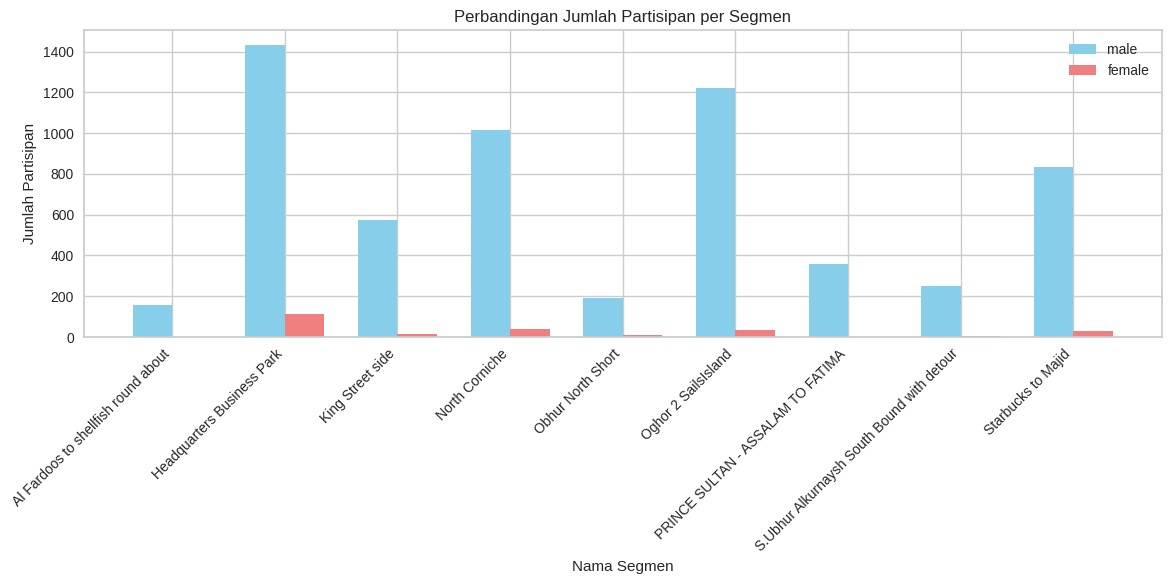

In [330]:
plt.figure(figsize=(12, 6))
x = np.arange(len(male_segments.index))
width = 0.35

plt.bar(x - width/2, male_segments['smt_avg_spd']['count'], width, label='male', color='skyblue')
plt.bar(x + width/2, female_segments['smt_avg_spd']['count'], width, label='female', color='lightcoral')

plt.xlabel('Nama Segmen')
plt.ylabel('Jumlah Partisipan')
plt.title('Perbandingan Jumlah Partisipan per Segmen')
plt.xticks(x, male_segments.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#### Boxplot Perbandingan Kecepatan

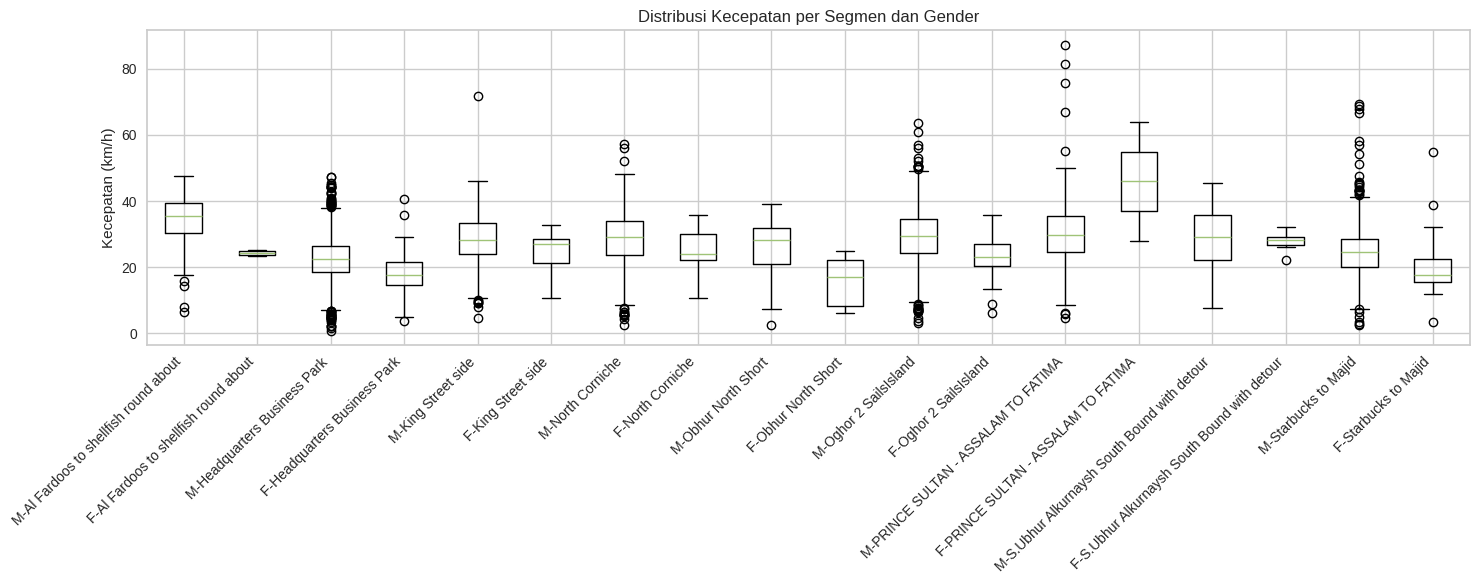

In [331]:
plt.figure(figsize=(15, 6))

data_to_plot = []
labels = []
for segment in male_segments.index:
    male_data = df_clean[(df_clean['gender'] == 'male') &
                        (df_clean['smt_name'] == segment)]['smt_avg_spd']
    female_data = df_clean[(df_clean['gender'] == 'female') &
                          (df_clean['smt_name'] == segment)]['smt_avg_spd']
    data_to_plot.extend([male_data, female_data])
    labels.extend([f'M-{segment}', f'F-{segment}'])

plt.boxplot(data_to_plot, labels=labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Kecepatan (km/h)')
plt.title('Distribusi Kecepatan per Segmen dan Gender')
plt.tight_layout()
plt.show()

#### Visualisasi Waktu Penyelesaian

<Figure size 1200x600 with 0 Axes>

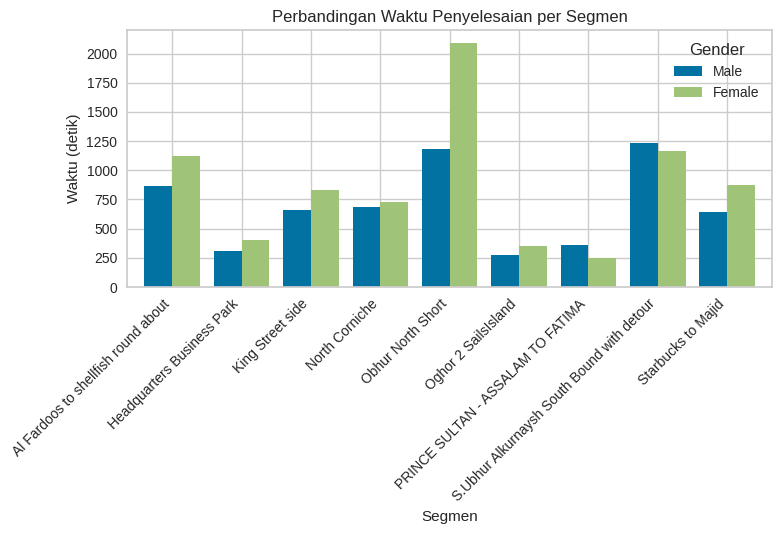

In [332]:
plt.figure(figsize=(12, 6))
time_comparison = pd.DataFrame({
    'Male': male_segments['smt_finish_seconds']['mean'],
    'Female': female_segments['smt_finish_seconds']['mean']
}).plot(kind='bar', width=0.8)
plt.title('Perbandingan Waktu Penyelesaian per Segmen')
plt.xlabel('Segmen')
plt.ylabel('Waktu (detik)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### Heatmap Distribusi Ranking

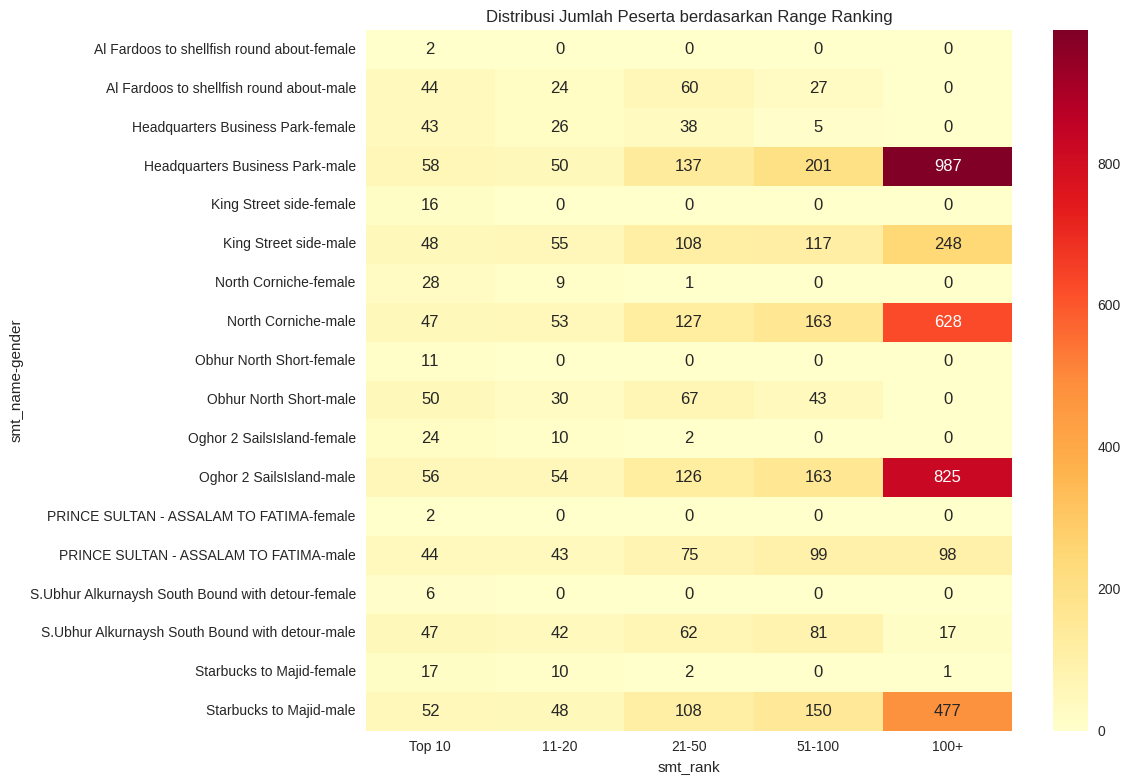

In [333]:
plt.figure(figsize=(12, 8))
rank_ranges = pd.cut(df_clean['smt_rank'],
                    bins=[0,10,20,50,100,float('inf')],
                    labels=['Top 10','11-20','21-50','51-100','100+'])

rank_dist = pd.crosstab([df_clean['smt_name'], df_clean['gender']], rank_ranges)

sns.heatmap(rank_dist, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Distribusi Jumlah Peserta berdasarkan Range Ranking')
plt.tight_layout()
plt.show()

#### Kesimpulan

Bedasarkan visualisasi diatas terlihat bahwa, Diperoleh beberapa insight berikut.
1. Pada saat mengukur partisipan laki-laki dan perempuan di setiap segment, Laki-laki cenderung memiliki jumlah partisipan yang jauh lebih banyak di banding dengan perempuan.
2. Pada saat mengukur distribusi kecepatan laki-laki dan perempuan pada setiap segmen. Median kecepatan laki-laki cenderung lebih tinggi dibandingkan perempuan. Namun, pada segment **PRINCE SULTAN-ASSALAM TO FATIMA** median kecepatan perempuan lebih tinggi, hanya saja terdapat outlier laki-laki yang jauh di atas IQR perempuan sehingga menunjukkan bahwa ada laki-laki yang dapat menyaingi perempuan pada segment ini meskipun jumlahnya sedikit.
3. Pada saat mengukur perbandingan waktu kecepatan pada setiap segment. Terlihat bahwa laki-laki lebih cepat menyelesaikan suatu segmen dan menunjukkan performa yang lebih baik, hanya saja pada segmen **Prince Sultan** dan **S. Ubhur Alkurnaysh** performa perempuan lebih baik. Oleh karena itu, terlihat bahwa ada suatu segmen yang memungkinkan perempuan lebih unggul di banding laki-laki.
4. Pada saat mengukur distribusi peserta Range Nilai. Laki-Laki mendominasi top 10 nilai tertinggi di semua segmen. Walaupun terdapat kasus unik dimana perempuan hanya diwakili oleh 2 orang di segmen tertentu, tetapi keduanya berhasil menjadi peringkat 1 di kategori umur masing-masing. Hal ini menunjukkan bahwa terdapat faktor partisipasi perempuan yang lebih sedikit , sehingga laki-laki lebih mendominasi ran tersebut.

Oleh karena itu, dapat disimpulkan bahwa terdapat perbedaan performa yang signifikan antara laki-laki dan perempuan pada segmen yang sama, di mana  laki-laki cenderung menunjukkan performa lebih baik dalam hal jumlah partisipan, median kecepatan dan waktu penyelesaian. Namun, perempuan tetap ada yang mampu untuk bersaing di segmen tertentu bahkan menunjukkan keunggulan pada suatu kategori spesifik meskipun jumlah yang berpartisipasi lebih sedikit.


## Segmen mana yang paling sering diikuti oleh peserta dari kategori usia tertentu?

#### Frekuensi segment Berdasarkan Kategori Umur

In [334]:
segment_age_freq = df_clean.groupby(['user_age_group', 'smt_name']).size().unstack(fill_value=0)
segment_age_freq

smt_name,Al Fardoos to shellfish round about,Headquarters Business Park,King Street side,North Corniche,Obhur North Short,Oghor 2 SailsIsland,PRINCE SULTAN - ASSALAM TO FATIMA,S.Ubhur Alkurnaysh South Bound with detour,Starbucks to Majid
user_age_group,,,,,,,,,
19 and under,9,93,26,44,10,46,14,17,38
20 to 24,9,170,48,97,11,120,17,17,79
25 to 34,57,691,247,459,68,568,139,96,383
35 to 44,47,428,183,309,63,357,123,86,270
45 to 54,30,131,65,112,37,137,50,29,76
55 to 64,4,25,20,29,10,24,16,8,16
65 to 69,0,3,1,3,1,4,1,1,2
70 to 74,0,1,0,1,0,1,0,0,0
75+,1,3,2,2,1,3,1,1,1


#### Visualisasi Line Chart

In [335]:
alphabet_labels = [chr(97 + i).upper() for i in range(len(segment_age_freq.columns))]

mapping_table = dict(zip(alphabet_labels, segment_age_freq.columns))
mapping_df = pd.DataFrame(list(mapping_table.items()), columns=['Label', 'Nama Segmen'])
mapping_df


,Label,Nama Segmen
0,A,Al Fardoos to shellfish round about
1,B,Headquarters Business Park
2,C,King Street side
3,D,North Corniche
4,E,Obhur North Short
5,F,Oghor 2 SailsIsland
6,G,PRINCE SULTAN - ASSALAM TO FATIMA
7,H,S.Ubhur Alkurnaysh South Bound with detour
8,I,Starbucks to Majid


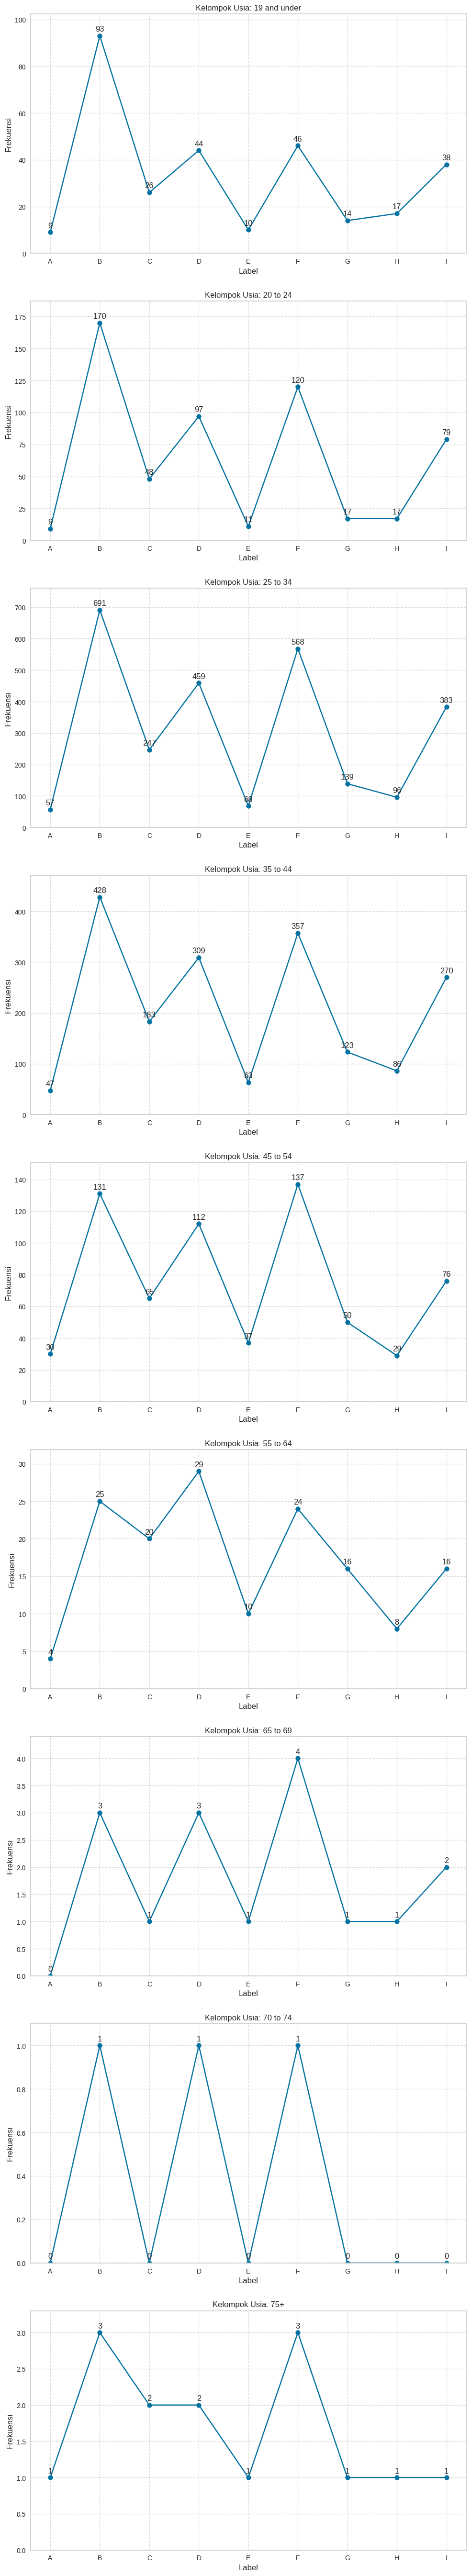

In [336]:
n_groups = len(segment_age_freq.index)

fig, axes = plt.subplots(n_groups, 1, figsize=(10, 6*n_groups))

for i, age_group in enumerate(segment_age_freq.index):
    ax = axes[i] if n_groups > 1 else axes

    ax.plot(alphabet_labels, segment_age_freq.loc[age_group], zorder=1)
    ax.scatter(alphabet_labels, segment_age_freq.loc[age_group], s=50, zorder=2)

    ax.set_title(f'Kelompok Usia: {age_group}', fontsize=12)
    ax.set_xlabel('Label', fontsize=12)
    ax.set_ylabel('Frekuensi', fontsize=12)

    ax.set_xticks(range(len(alphabet_labels)))
    ax.set_xticklabels(alphabet_labels, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

    y_max = segment_age_freq.loc[age_group].max()
    ax.set_ylim(0, y_max + (y_max * 0.1))

    for x, y in zip(range(len(alphabet_labels)), segment_age_freq.loc[age_group]):
        ax.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,7), ha='center')

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

#### Kesimpulan

Berdasarkan hasil analisis line chart di atas, dapat disimpulkan bahwa segmen **Headquarters Business Park** adalah segmen yang paling dominan dan menarik perhatian mayoritas kelompok usia, terutama pada kelompok usia `19 and under`, `20 to 24`, `25 to 34`, dan `35 to 44`, dengan frekuensi tertinggi masing-masing sebesar 93, 170, 691, dan 428. Hal ini menunjukkan bahwa segmen tersebut menjadi daya tarik utama bagi kelompok usia produktif dan menengah.

Segmen **Oghor 2 SailsIsland** juga memiliki daya tarik tersendiri, khususnya bagi kelompok usia `45 to 54` dengan frekuensi tertinggi sebesar 137 dan kelompok usia `65 to 69` dengan frekuensi tertinggi sebesar 4. Selain itu, segmen **North Corniche** menunjukkan daya tarik khusus pada kelompok usia `55 to 64` dengan frekuensi sebesar 29 peserta.

Kasus unik terlihat pada kelompok usia `70 to 74`, di mana tidak ada segmen yang secara dominan diikuti karena frekuensi tertinggi tersebar merata di tiga segmen, yaitu **Headquarters Business Park**, **North Corniche**, dan **Oghor 2 SailsIsland**, masing-masing dengan frekuensi 1 peserta. Hal ini menunjukkan tidak adanya preferensi segmen yang jelas pada kelompok usia ini.

Pada kelompok usia `75+`, segmen **Headquarters Business Park** dan **Oghor 2 SailsIsland** sama-sama memiliki frekuensi sebesar 3 peserta, menunjukkan bahwa kedua segmen ini masih relevan meskipun dengan daya tarik yang lebih rendah dibanding kelompok usia lainnya.

Secara keseluruhan, **Headquarters Business Park** dapat dianggap sebagai segmen utama yang paling menarik di berbagai kelompok usia, sedangkan **Oghor 2 SailsIsland** dan **North Corniche** menjadi segmen pelengkap yang relevan untuk kelompok usia tertentu. Preferensi segmen menunjukkan pola yang berbeda-beda sesuai dengan kelompok usia, dengan daya tarik segmen yang cenderung menurun pada usia yang lebih tua.

Referensi :
https://medium.com/@gozdemadendere/data-visualization-for-exploratory-data-analysis-eda-ddf850539575

# Modelling

## Decision Tree

#### Load Data

In [337]:
df_dt = df_clean.copy()
df_dt.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,25 to 34,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,25 to 34,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,25 to 34,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,25 to 34,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,25 to 34,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


In [338]:
df_dt['gender'] = df_dt['gender'].map({'female': 1, 'male':2})
df_dt.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,25 to 34,2017-12-22,2,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,25 to 34,2015-04-13,2,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,25 to 34,2018-02-07,2,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,25 to 34,2018-08-24,2,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,25 to 34,2020-03-06,1,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


#### Encode data

In [339]:
unique_summary = {
    "Attribute": [],
    "Unique Count": [],
    "Unique Values": []
}

for column in ["user_age_group", "attempt_date", "smt_name","user_weight_category", "act_title"]:
    unique_values = df_dt[column].unique()
    unique_summary["Attribute"].append(column)
    unique_summary["Unique Count"].append(len(unique_values))
    unique_summary["Unique Values"].append(unique_values)

unique_summary_df = pd.DataFrame(unique_summary)
unique_summary_df

,Attribute,Unique Count,Unique Values
0,user_age_group,9,"[25 to 34, 19 and under, 35 to 44, 55 to 64, 4..."
1,attempt_date,1457,"[2017-12-22, 2015-04-13, 2018-02-07, 2018-08-2..."
2,smt_name,9,"[Headquarters Business Park, Oghor 2 SailsIsla..."
3,user_weight_category,8,"[54 kg and under, 105 kg to 114 kg, 75 to 84 k..."
4,act_title,1051,"[Night Ride, Evening Ride, Afternoon Ride, ثان..."


Preprocessing dengan membuat kolom `user_age_group`, `user_weight_category`, `smt_name` menjadi numerikal dengan ketentuan berikut:

i. User age Group
* 19 and under -> 0
* 20 to 24 -> 1
* 25 to 34 -> 2
* 35 to 44 -> 3
* 45 to 54 -> 4
* 55 to 64 -> 5
* 65 to 69 -> 6
* 70 to 74 -> 7
* 75+ -> 8

ii. User weight category
* 54 kg and under -> 0
* 55 kg to 64 kg -> 1
* 65 kg to 74 kg -> 2
* 75 kg to 84 kg -> 3
* 85 kg to 95 kg -> 4
* 95 kg to 104 kg -> 5
* 105 kg to 114 kg -> 6
* 115 kg and over -> 7


In [340]:
# Mapping untuk User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}

df_dt['user_age_group'] = df_dt['user_age_group'].map(age_mapping)
df_dt.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,2,2017-12-22,2,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,2,2015-04-13,2,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,2,2018-02-07,2,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,2,2018-08-24,2,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,2,2020-03-06,1,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


In [341]:
# Mapping untuk User Weight Category
mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}

df_dt['user_weight_category'] = df_dt['user_weight_category'].map(mapping)
df_dt

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,2,2017-12-22,2,712,15.8,382,Headquarters Business Park,0,Night Ride,13.6,34.9,19.24,5103,5103,0
1,2,2015-04-13,2,189,33.2,216,Oghor 2 SailsIsland,6,Night Ride,21.5,43.2,23.47,3926,3926,0
2,2,2018-02-07,2,264,23.7,593,Starbucks to Majid,3,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,2,2018-08-24,2,50,33.4,817,Al Fardoos to shellfish round about,3,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,2,2020-03-06,1,19,21.3,284,Headquarters Business Park,0,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,2,2018-07-16,2,431,22.3,778,North Corniche,0,Night Ride,17.9,96.5,41.93,8446,8446,0
6288,3,2018-11-21,2,34,38.9,446,North Corniche,4,تمرين جده ١٣/٣/٤٠,34.5,52.2,48.13,5026,5026,1
6289,3,2013-08-11,2,218,22.1,637,Starbucks to Majid,3,Night Ride,17.6,40.7,50.64,10374,10374,0
6290,3,2015-04-24,2,477,12.4,485,Headquarters Business Park,4,Morning Ride,14.5,34.9,40.93,10158,10158,0


In [342]:
df_dt = pd.get_dummies(df_dt, columns=['smt_name'])
df_dt.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2017-12-22,2,712,15.8,382,0,Night Ride,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,2,2015-04-13,2,189,33.2,216,6,Night Ride,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,2,2018-02-07,2,264,23.7,593,3,Evening Ride,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,2,2018-08-24,2,50,33.4,817,3,Afternoon Ride,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,2,2020-03-06,1,19,21.3,284,0,ثاني تمرين ١٠٠كم,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False


In [343]:
# Frequency Encoding untuk act_title
freq_map = df_dt['act_title'].value_counts(normalize=True)
df_dt['act_title'] = df_dt['act_title'].map(freq_map)
df_dt.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2017-12-22,2,712,15.8,382,0,0.132072,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,2,2015-04-13,2,189,33.2,216,6,0.132072,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,2,2018-02-07,2,264,23.7,593,3,0.281310,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,2,2018-08-24,2,50,33.4,817,3,0.092498,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,2,2020-03-06,1,19,21.3,284,0,0.000477,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False


In [344]:
#encoding attempt_date
df_dt['attempt_date'] = pd.to_datetime(df_dt['attempt_date'])

df_dt['attempt_year'] = df_dt['attempt_date'].dt.year
df_dt['attempt_month'] = df_dt['attempt_date'].dt.month
df_dt['attempt_day'] = df_dt['attempt_date'].dt.day

df_dt = df_dt.drop('attempt_date', axis=1)
df_dt.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid,attempt_year,attempt_month,attempt_day
0,2,2,712,15.8,382,0,0.132072,13.6,34.9,19.24,...,False,False,False,False,False,False,False,2017,12,22
1,2,2,189,33.2,216,6,0.132072,21.5,43.2,23.47,...,False,False,False,True,False,False,False,2015,4,13
2,2,2,264,23.7,593,3,0.281310,26.7,92.9,38.23,...,False,False,False,False,False,False,True,2018,2,7
3,2,2,50,33.4,817,3,0.092498,31.4,54.4,65.77,...,False,False,False,False,False,False,False,2018,8,24
4,2,1,19,21.3,284,0,0.000477,19.9,43.2,96.53,...,False,False,False,False,False,False,False,2020,3,6


Encoding setiap data yang digunakan telah dipilih dengan mempertimbangkan sifat dan kebutuhan analisis dari setiap atribut. Untuk kolom `user_age_group` dan `user_weight_category`, mapping dipilih karena kedua kolom ini memiliki nilai kategorikal yang bersifat ordinal, di mana terdapat urutan logis antar kategori, seperti usia atau kelompok berat badan. Mapping membantu mengonversi kategori tersebut menjadi angka yang merepresentasikan hubungan hierarkis. Sementara itu, kolom `smt_name` menggunakan one-hot encoding karena kategorinya bersifat nominal, tanpa hubungan ordinal. Teknik ini memastikan bahwa setiap kategori diperlakukan setara oleh model tanpa asumsi hubungan, sekaligus menjaga interpretasi data tetap sederhana karena jumlah kategorinya relatif kecil.

Untuk kolom `act_title`, frequency encoding dipilih karena kolom ini memiliki banyak kategori unik, yang akan menyebabkan lonjakan jumlah fitur jika menggunakan one-hot encoding. Dengan mengganti kategori dengan frekuensi kemunculannya, model dapat menangkap pentingnya suatu kategori berdasarkan distribusinya, tanpa menambah dimensi data secara signifikan. Terakhir, pada kolom `attempt_date`, data waktu diolah dengan memisahkannya menjadi atribut tahun, bulan, dan hari. Hal ini memungkinkan model untuk mengenali pola temporal yang tidak akan terlihat jika data tetap dalam format datetime.

Proses encoding berdasarkan source dibawah ini:
* https://www.geeksforgeeks.org/ml-one-hot-encoding/#what-is-one-hot-encoding
* https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning
* https://sagarikakathuria29.medium.com/understanding-the-difference-between-target-encoding-and-frequency-encoding-1d9bd264b8e


#### Proses Modelling

In [345]:
X = df_dt.drop(columns=['gender'])
y = df_dt['gender']

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

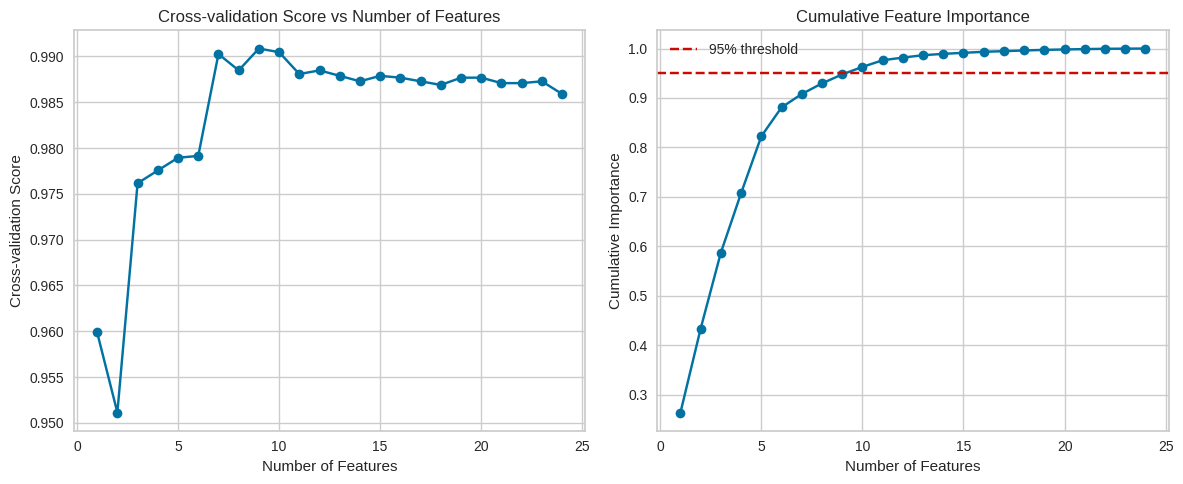

Optimal k based on CV score: 9
Optimal k based on 95% importance: 10
Maximum CV score: 0.991

Feature Importance Ranking:
                                              Feature       Score
1                                            smt_rank  185.329845
4                                user_weight_category  119.352278
2                                         smt_avg_spd  108.012704
21                                       attempt_year   84.415463
6                                         act_avg_spd   80.752706
13                smt_name_Headquarters Business Park   41.025530
0                                      user_age_group   19.024687
8                                        act_total_km   15.071157
3                                  smt_finish_seconds   12.794276
18         smt_name_PRINCE SULTAN - ASSALAM TO FATIMA   10.630587
7                                         act_max_spd    9.482825
17                       smt_name_Oghor 2 SailsIsland    3.769421
14                  

In [347]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Mencari k optimal
def find_optimal_k(X_train_scaled, y_train, max_features=None):
    if max_features is None:
        max_features = X_train_scaled.shape[1]

    k_range = range(1, max_features + 1)
    scores = []
    cv_scores = []

    for k in k_range:
        # Seleksi fitur
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X_train_scaled, y_train)

        # Evaluasi dengan cross validation
        clf = DecisionTreeClassifier(random_state=42)
        cv_score = cross_val_score(clf, X_selected, y_train, cv=5).mean()
        cv_scores.append(cv_score)

        # Simpan f-scores
        scores.append(selector.scores_)

    # Plot hasil
    plt.figure(figsize=(12, 5))

    # Plot 1: CV Scores
    plt.subplot(1, 2, 1)
    plt.plot(k_range, cv_scores, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Score')
    plt.title('Cross-validation Score vs Number of Features')

    # Plot 2: Cumulative Feature Importance
    plt.subplot(1, 2, 2)
    cumulative_importance = np.cumsum(np.sort(scores[0])[::-1]) / np.sum(scores[0])
    plt.plot(k_range, cumulative_importance, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Temukan k optimal
    k_optimal_cv = k_range[np.argmax(cv_scores)]
    k_optimal_95 = np.where(cumulative_importance >= 0.95)[0][0] + 1

    print(f"Optimal k based on CV score: {k_optimal_cv}")
    print(f"Optimal k based on 95% importance: {k_optimal_95}")
    print(f"Maximum CV score: {max(cv_scores):.3f}")

    # Feature importance ranking
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_train_scaled, y_train)
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\nFeature Importance Ranking:")
    print(feature_scores)

    return k_optimal_cv, feature_scores

# Jalankan fungsi
k_optimal, feature_scores = find_optimal_k(X_train, y_train)


Pada tahap ini, **Feature selection** dilakukan untuk meningkatkan performa model prediktif dengan memilih fitur-fitur yang paling relevan, menghilangkan fitur yang redundan atau tidak signifikan, dan menyederhanakan struktur model. Terlihat bahwa, model mencapai performa optimal dengan menggunakan 9 fitur berdasarkan CV score. Seperti yang terlihat pada grafik cross-validation score, Penambahan fitur setelah jumlah tersebut tidak memberikan kontribusi berarti bahkan cenderung menurunkan performa. Selain itu, proses feature selection membantu mengurangi waktu komputasi, menjadikan pelatihan dan prediksi lebih efisien tanpa mengorbankan akurasi model. Grafik cumulative feature importance juga menunjukkan bahwa fitur tambahan setelah kontribusi kumulatif 95% cenderung hanya menambah noise daripada informasi yang relevan, sehingga risiko overfitting dapat diminimalkan.

Selain meningkatkan efisiensi, feature selection memberikan interpretabilitas yang lebih baik terhadap model. Fitur dengan skor tinggi, seperti 'smt_rank,' 'user_weight_category,' dan 'smt_avg_spd,' menunjukkan pengaruh signifikan terhadap hasil prediksi. Sementara itu, fitur dengan skor rendah dapat diabaikan tanpa mengurangi performa model. Pendekatan ini tidak hanya menyederhanakan model, tetapi juga memastikan bahwa fitur-fitur yang digunakan benar-benar relevan. Dengan demikian, penggunaan feature selection memungkinkan pembuatan model yang lebih sederhana, efisien, dan robust, sekaligus memastikan akurasi dan daya prediksi yang tinggi.

Referensi:   
* https://www.heavy.ai/technical-glossary/feature-selection#:~:text=Feature%20selection%20is%20the%20process,of%20datasets%20continue%20to%20grow.

In [348]:
class_counts = df_dt['gender'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()

print(f"Rasio kelas minoritas terhadap mayoritas: {imbalance_ratio:.2f}")

Rasio kelas minoritas terhadap mayoritas: 0.04


Dataset ini memiliki proporsi 0.04, yang menunjukkan bahwa kelas minoritas hanya sekitar 4% dari total dataset. Berdasarkan aturan umum, dataset dianggap imbalanced jika kelas minoritas kurang dari 10-20%, dan proporsi sebesar 0.04 berada jauh di bawah ambang batas tersebut. Ketidakseimbangan ini menyebabkan sebagian besar data didominasi oleh kelas mayoritas, sehingga dapat menyebabkan prioritas lebih tinggi pada kelas mayoritas dan mengabaikan kelas minoritas dalam proses klasifikasi.

Referensi:
* https://datascience.stackexchange.com/questions/122571/determining-whether-a-dataset-is-imbalanced-or-not

In [349]:
# Setelah mendapatkan k optimal, buat pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import ADASYN

# Pipeline dengan k optimal
pipeline = ImblearnPipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=k_optimal)),
    ('sampler', ADASYN(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest(k=9)),
                ('sampler', ADASYN(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [350]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

Pipeline di gunakan melalui pendekatan berikut yaitu **StandardScaler**, **Feature Selection**, **ADASYN**, dan **Decision Tree Classifier**.
* **StandardScaler** digunakan untuk menstandardisasi data agar memiliki mean 0 dan variance 1, yang membantu model dalam mengelola variabilitas antar fitur. Meskipun sensitif terhadap outlier, pada **Decision Tree**, normalisasi tidak terlalu berpengaruh karena model ini tidak bergantung pada jarak antar data poin.
* **Feature Selection** dengan menggunakan **SelectKBest** dan **f_classif** membantu memilih fitur yang paling relevan untuk target, mengurangi kompleksitas model dan risiko overfitting dengan mempertahankan hanya fitur yang paling informatif.

* **ADASYN** diterapkan untuk menangani ketidakseimbangan kelas dengan cara menggenerasi data sintetis dari kelas minoritas, yang memberikan model lebih banyak informasi untuk belajar. Teknik ini  dipilih karena dataset ini memiliki proporsi kelas minoritas yang rendah yaitu 4%.

* **Decision Tree Classifier** dipilih karena kemampuannya  untuk menangkap hubungan non-linear antar fitur dan target, serta mudah dipahami dan diinterpretasikan.

Referensi:  
* https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9
* https://medium.com/@penpencil.blr/data-imbalance-how-is-adasyn-different-from-smote-f4eba54867ab
* https://medium.com/@penpencil.blr/data-imbalance-how-is-adasyn-different-from-smote-f4eba54867ab

#### Hasil Evaluasi Model

In [351]:
from sklearn.metrics import precision_score,recall_score, classification_report,accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Berikut adalah informasi lengkap tentang performa model : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

evaluate_classifier_performance(y_pred,y_val)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.89      0.96      0.92        51
           2       1.00      1.00      1.00      1208

    accuracy                           0.99      1259
   macro avg       0.94      0.98      0.96      1259
weighted avg       0.99      0.99      0.99      1259



Confusion Matrix



prediction,1,2
actual,,
1,49,2
2,6,1202




Berikut adalah informasi lengkap tentang performa model : 
Accuracy Average: 0.9936457505957109
F1 Macro Average: 0.9606057761506931
F1 Micro Average: 0.9936457505957109
Precision Macro Average: 0.9446239806704924
Precision Micro Average: 0.9936457505957109
Recall Macro Average: 0.9779087131541359
Recall Micro Average: 0.9936457505957109



#### Test Data

##### Load and Process data

In [352]:
test_data = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

id_test = test_data['id'].copy()
test_data.drop(["id", "user_id"], axis=1, inplace=True)

##### Check missing values

In [353]:
# Cek missing values awal
print("Missing values before:")
print(test_data.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_finish_seconds       0
smt_name                 0
user_weight_category    36
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
dtype: int64


In [354]:
mode_value = test_data['user_weight_category'].mode()[0]
test_data['user_weight_category'] = test_data['user_weight_category'].fillna(mode_value)


##### Encode data

In [355]:
# 1. Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data['user_age_group'] = test_data['user_age_group'].map(age_mapping)
test_data.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,2,2018-03-12,112,28.9,487,Starbucks to Majid,75 to 84 kg,Mittagsradfahrt,25.5,45.7,50.39,7128,7128,0
1,3,2016-11-02,190,20.3,840,King Street side,85 to 95 kg,Evening Ride,19.9,37.8,35.00,6338,6338,0
2,3,2018-06-22,55,23.1,1180,Al Fardoos to shellfish round about,65 to 74 kg,Morning Ride,24.0,81.0,108.01,16202,16202,0
3,3,2015-01-31,222,21.9,643,Starbucks to Majid,75 to 84 kg,Morning Ride,20.7,36.0,21.79,3787,3787,0
4,3,2014-10-21,278,22.7,266,Headquarters Business Park,65 to 74 kg,تمرين مع أحمد سعيد,23.8,43.9,31.05,4699,4699,0


In [356]:
# 2. Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data['user_weight_category'] = test_data['user_weight_category'].map(weight_mapping)

In [357]:
# mapping = {
#     'Starbucks to Majid': 0,
#     'King Street side': 1,
#     'Al Fardoos to shellfish round about': 2,
#     'Headquarters Business Park': 3,
#     'PRINCE SULTAN - ASSALAM TO FATIMA': 4,
#     'Oghor 2 SailsIsland': 5,
#     'Obhur North Short': 6,
#     'North Corniche': 7,
#     'S.Ubhur Alkurnaysh South Bound with detour': 8
# }

# test_data['smt_name'] = test_data['smt_name'].map(mapping)

test_data = pd.get_dummies(test_data, columns=['smt_name'])
test_data.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2018-03-12,112,28.9,487,3,Mittagsradfahrt,25.5,45.7,50.39,...,0,False,False,False,False,False,False,False,False,True
1,3,2016-11-02,190,20.3,840,4,Evening Ride,19.9,37.8,35.00,...,0,False,False,True,False,False,False,False,False,False
2,3,2018-06-22,55,23.1,1180,2,Morning Ride,24.0,81.0,108.01,...,0,True,False,False,False,False,False,False,False,False
3,3,2015-01-31,222,21.9,643,3,Morning Ride,20.7,36.0,21.79,...,0,False,False,False,False,False,False,False,False,True
4,3,2014-10-21,278,22.7,266,2,تمرين مع أحمد سعيد,23.8,43.9,31.05,...,0,False,True,False,False,False,False,False,False,False


In [358]:
# 4. Frequency Encoding untuk act_title
freq_map = test_data['act_title'].value_counts(normalize=True)
test_data['act_title'] = test_data['act_title'].map(freq_map)

In [359]:
# 5. Encoding attempt_date
test_data['attempt_date'] = pd.to_datetime(test_data['attempt_date'])
test_data['attempt_year'] = test_data['attempt_date'].dt.year
test_data['attempt_month'] = test_data['attempt_date'].dt.month
test_data['attempt_day'] = test_data['attempt_date'].dt.day
test_data = test_data.drop('attempt_date', axis=1)

In [360]:
test_data.isnull().sum()

,0
user_age_group,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
user_weight_category,0
act_title,0
act_avg_spd,0
act_max_spd,0
act_total_km,0
act_moving_seconds,0


##### Predict data test

In [361]:
test_predictions = pipeline.predict(test_data)

#Buat file submission

submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_predictions
})

#Simpan ke CSV

submission.to_csv('submission.csv', index=False)
submission.head()

,id,gender
0,265,2
1,2473,2
2,1835,2
3,865,2
4,7404,2


## Decision Tree with Hypertuning

#### Proses modelling

In [362]:
df_dt_hyp = df_dt.copy()
df_dt_hyp.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid,attempt_year,attempt_month,attempt_day
0,2,2,712,15.8,382,0,0.132072,13.6,34.9,19.24,...,False,False,False,False,False,False,False,2017,12,22
1,2,2,189,33.2,216,6,0.132072,21.5,43.2,23.47,...,False,False,False,True,False,False,False,2015,4,13
2,2,2,264,23.7,593,3,0.281310,26.7,92.9,38.23,...,False,False,False,False,False,False,True,2018,2,7
3,2,2,50,33.4,817,3,0.092498,31.4,54.4,65.77,...,False,False,False,False,False,False,False,2018,8,24
4,2,1,19,21.3,284,0,0.000477,19.9,43.2,96.53,...,False,False,False,False,False,False,False,2020,3,6


In [363]:
X = df_dt_hyp.drop(columns=['gender'])
y = df_dt_hyp['gender']

In [364]:
X_hyp_train, X_hyp_val, y_hyp_train, y_hyp_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

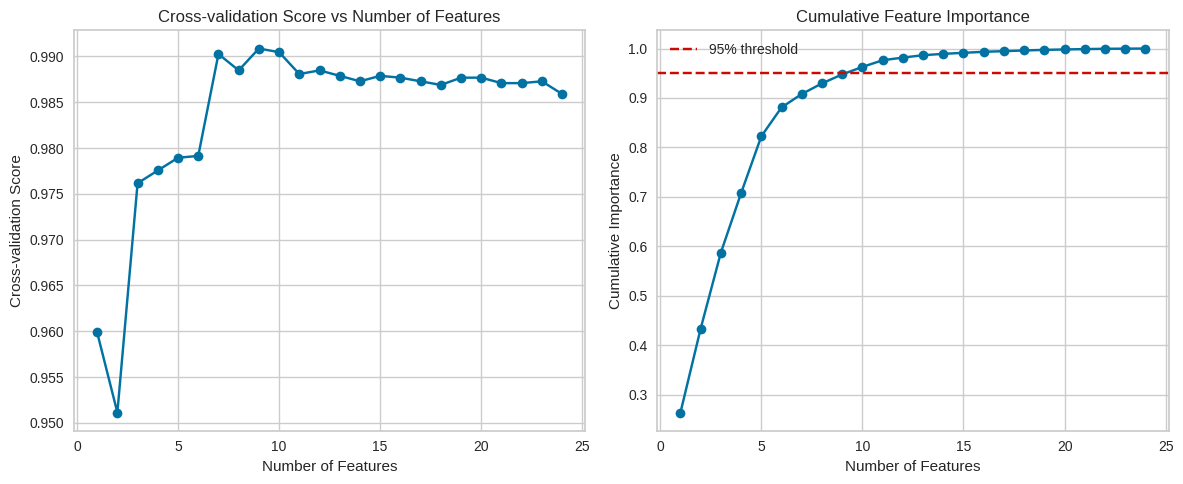

Optimal k based on CV score: 9
Optimal k based on 95% importance: 10
Maximum CV score: 0.991

Feature Importance Ranking:
                                              Feature       Score
1                                            smt_rank  185.329845
4                                user_weight_category  119.352278
2                                         smt_avg_spd  108.012704
21                                       attempt_year   84.415463
6                                         act_avg_spd   80.752706
13                smt_name_Headquarters Business Park   41.025530
0                                      user_age_group   19.024687
8                                        act_total_km   15.071157
3                                  smt_finish_seconds   12.794276
18         smt_name_PRINCE SULTAN - ASSALAM TO FATIMA   10.630587
7                                         act_max_spd    9.482825
17                       smt_name_Oghor 2 SailsIsland    3.769421
14                  

In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Mencari k optimal
def find_optimal_k(X_train_scaled, y_train, max_features=None):
    if max_features is None:
        max_features = X_train_scaled.shape[1]

    k_range = range(1, max_features + 1)
    scores = []
    cv_scores = []

    for k in k_range:
        # Seleksi fitur
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X_train_scaled, y_train)

        # Evaluasi dengan cross validation
        clf = DecisionTreeClassifier(random_state=42)
        cv_score = cross_val_score(clf, X_selected, y_train, cv=5).mean()
        cv_scores.append(cv_score)

        # Simpan f-scores
        scores.append(selector.scores_)

    # Plot hasil
    plt.figure(figsize=(12, 5))

    # Plot 1: CV Scores
    plt.subplot(1, 2, 1)
    plt.plot(k_range, cv_scores, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Score')
    plt.title('Cross-validation Score vs Number of Features')

    # Plot 2: Cumulative Feature Importance
    plt.subplot(1, 2, 2)
    cumulative_importance = np.cumsum(np.sort(scores[0])[::-1]) / np.sum(scores[0])
    plt.plot(k_range, cumulative_importance, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Temukan k optimal
    k_optimal_cv = k_range[np.argmax(cv_scores)]
    k_optimal_95 = np.where(cumulative_importance >= 0.95)[0][0] + 1

    print(f"Optimal k based on CV score: {k_optimal_cv}")
    print(f"Optimal k based on 95% importance: {k_optimal_95}")
    print(f"Maximum CV score: {max(cv_scores):.3f}")

    # Feature importance ranking
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_train_scaled, y_train)
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\nFeature Importance Ranking:")
    print(feature_scores)

    return k_optimal_cv, feature_scores

# Jalankan fungsi
k_optimal, feature_scores = find_optimal_k(X_hyp_train, y_hyp_train)


In [366]:
k_optimal

9

Pada tahap ini, **Feature selection** dilakukan untuk meningkatkan performa model prediktif dengan memilih fitur-fitur yang paling relevan, menghilangkan fitur yang redundan atau tidak signifikan, dan menyederhanakan struktur model. Terlihat bahwa, model mencapai performa optimal dengan menggunakan 9 fitur berdasarkan CV score. Seperti yang terlihat pada grafik cross-validation score, Penambahan fitur setelah jumlah tersebut tidak memberikan kontribusi berarti bahkan cenderung menurunkan performa. Selain itu, proses feature selection membantu mengurangi waktu komputasi, menjadikan pelatihan dan prediksi lebih efisien tanpa mengorbankan akurasi model. Grafik cumulative feature importance juga menunjukkan bahwa fitur tambahan setelah kontribusi kumulatif 95% cenderung hanya menambah noise daripada informasi yang relevan, sehingga risiko overfitting dapat diminimalkan.

Selain meningkatkan efisiensi, feature selection memberikan interpretabilitas yang lebih baik terhadap model. Fitur dengan skor tinggi, seperti 'smt_rank,' 'user_weight_category,' dan 'smt_avg_spd,' menunjukkan pengaruh signifikan terhadap hasil prediksi. Sementara itu, fitur dengan skor rendah dapat diabaikan tanpa mengurangi performa model. Pendekatan ini tidak hanya menyederhanakan model, tetapi juga memastikan bahwa fitur-fitur yang digunakan benar-benar relevan. Dengan demikian, penggunaan feature selection memungkinkan pembuatan model yang lebih sederhana, efisien, dan robust, sekaligus memastikan akurasi dan daya prediksi yang tinggi.

Referensi:   
* https://www.heavy.ai/technical-glossary/feature-selection#:~:text=Feature%20selection%20is%20the%20process,of%20datasets%20continue%20to%20grow.

In [367]:
# mengecheck imbalanced data
class_counts = df_dt_hyp['gender'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()

print(f"Rasio kelas minoritas terhadap mayoritas: {imbalance_ratio:.2f}")

Rasio kelas minoritas terhadap mayoritas: 0.04


Dataset ini memiliki proporsi 0.04, yang menunjukkan bahwa kelas minoritas hanya sekitar 4% dari total dataset. Berdasarkan aturan umum, dataset dianggap imbalanced jika kelas minoritas kurang dari 10-20%, dan proporsi sebesar 0.04 berada jauh di bawah ambang batas tersebut. Ketidakseimbangan ini menyebabkan sebagian besar data didominasi oleh kelas mayoritas, sehingga dapat menyebabkan prioritas lebih tinggi pada kelas mayoritas dan mengabaikan kelas minoritas dalam proses klasifikasi.

Referensi:
* https://datascience.stackexchange.com/questions/122571/determining-whether-a-dataset-is-imbalanced-or-not

##### proses Hyperparameter tuning

In [368]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': range(5, 45, 2),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': ['balanced']
}

In [369]:
from imblearn.over_sampling import ADASYN
pipeline = ImblearnPipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=k_optimal)),
    ('sampler', ADASYN(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest(k=9)),
                ('sampler', ADASYN(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [370]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_hyp_train, y_hyp_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', SelectKBest(k=9)),
                                       ('sampler', ADASYN(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(5, 45, 2),
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [371]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 13, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.89


Pada pipeline ini, untuk meningkatkan performa Decision Tree Classifier, dilakukan hyperparameter tuning menggunakan GridSearchCV dengan mengatur beberapa hyperparameter, seperti max_depth, min_samples_split, min_samples_leaf, criterion, dan class_weight. Tujuan dari tuning ini adalah untuk mencari kombinasi hyperparameter yang optimal, yang dapat meningkatkan kemampuan model dalam mengatasi ketidakseimbangan kelas dan menghasilkan model yang lebih baik dalam memprediksi data.

Namun, meskipun dilakukan tuning, hasil yang diperoleh menunjukkan bahwa best cross-validation score yang didapat setelah tuning hanya sebesar 0.89. Hasil ini ternyata lebih buruk dibandingkan dengan model Decision Tree yang tidak menggunakan hyperparameter tuning, yang memiliki performa f1-score lebih baik. Hal ini mungkin disebabkan oleh banyaknya variasi dalam data yang menyebabkan tuning menjadi kurang efektif, atau kombinasi hyperparameter yang dihasilkan kurang sesuai untuk karakteristik dataset yang digunakan.

Referensi:  
* https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/


In [372]:
best_pipeline = grid_search.best_estimator_
y_hyp_pred = best_pipeline.predict(X_hyp_val)

##### Evaluasi performance

In [373]:
evaluate_classifier_performance(y_hyp_pred,y_hyp_val)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        51
           2       1.00      1.00      1.00      1208

    accuracy                           0.99      1259
   macro avg       0.95      0.97      0.96      1259
weighted avg       0.99      0.99      0.99      1259



Confusion Matrix



prediction,1,2
actual,,
1,48,3
2,5,1203




Berikut adalah informasi lengkap tentang performa model : 
Accuracy Average: 0.9936457505957109
F1 Macro Average: 0.9598814607099612
F1 Micro Average: 0.9936457505957109
Precision Macro Average: 0.9515864075847179
Precision Micro Average: 0.9936457505957109
Recall Macro Average: 0.9685186988702765
Recall Micro Average: 0.9936457505957109



#### Test data

##### Load and Process data

In [374]:
test_data_hyp = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

id_test = test_data_hyp['id'].copy()
test_data_hyp.drop(["id", "user_id"], axis=1, inplace=True)

##### Check missing Values

In [375]:
# Cek missing values awal
print("Missing values before:")
print(test_data_hyp.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_finish_seconds       0
smt_name                 0
user_weight_category    36
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
dtype: int64


In [376]:
mode_value = test_data_hyp['user_weight_category'].mode()[0]
test_data_hyp['user_weight_category'] = test_data_hyp['user_weight_category'].fillna(mode_value)

##### Encode data

In [377]:
# 1. Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data_hyp['user_age_group'] = test_data_hyp['user_age_group'].map(age_mapping)
test_data_hyp.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,2,2018-03-12,112,28.9,487,Starbucks to Majid,75 to 84 kg,Mittagsradfahrt,25.5,45.7,50.39,7128,7128,0
1,3,2016-11-02,190,20.3,840,King Street side,85 to 95 kg,Evening Ride,19.9,37.8,35.00,6338,6338,0
2,3,2018-06-22,55,23.1,1180,Al Fardoos to shellfish round about,65 to 74 kg,Morning Ride,24.0,81.0,108.01,16202,16202,0
3,3,2015-01-31,222,21.9,643,Starbucks to Majid,75 to 84 kg,Morning Ride,20.7,36.0,21.79,3787,3787,0
4,3,2014-10-21,278,22.7,266,Headquarters Business Park,65 to 74 kg,تمرين مع أحمد سعيد,23.8,43.9,31.05,4699,4699,0


In [378]:
# 2. Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data_hyp['user_weight_category'] = test_data_hyp['user_weight_category'].map(weight_mapping)

In [379]:
test_data_hyp = pd.get_dummies(test_data_hyp, columns=['smt_name'])
test_data_hyp.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2018-03-12,112,28.9,487,3,Mittagsradfahrt,25.5,45.7,50.39,...,0,False,False,False,False,False,False,False,False,True
1,3,2016-11-02,190,20.3,840,4,Evening Ride,19.9,37.8,35.00,...,0,False,False,True,False,False,False,False,False,False
2,3,2018-06-22,55,23.1,1180,2,Morning Ride,24.0,81.0,108.01,...,0,True,False,False,False,False,False,False,False,False
3,3,2015-01-31,222,21.9,643,3,Morning Ride,20.7,36.0,21.79,...,0,False,False,False,False,False,False,False,False,True
4,3,2014-10-21,278,22.7,266,2,تمرين مع أحمد سعيد,23.8,43.9,31.05,...,0,False,True,False,False,False,False,False,False,False


In [380]:
# 4. Frequency Encoding untuk act_title
freq_map = test_data_hyp['act_title'].value_counts(normalize=True)
test_data_hyp['act_title'] = test_data_hyp['act_title'].map(freq_map)

In [381]:
# 5. Encoding attempt_date
test_data_hyp['attempt_date'] = pd.to_datetime(test_data_hyp['attempt_date'])
test_data_hyp['attempt_year'] = test_data_hyp['attempt_date'].dt.year
test_data_hyp['attempt_month'] = test_data_hyp['attempt_date'].dt.month
test_data_hyp['attempt_day'] = test_data_hyp['attempt_date'].dt.day
test_data_hyp = test_data_hyp.drop('attempt_date', axis=1)

In [382]:
test_data_hyp.isnull().sum()

,0
user_age_group,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
user_weight_category,0
act_title,0
act_avg_spd,0
act_max_spd,0
act_total_km,0
act_moving_seconds,0


##### Predict data test

In [383]:
test_hyp_predictions = best_pipeline.predict(test_data_hyp)

submission = pd.DataFrame({
'id': id_test,
'gender': test_hyp_predictions
})

submission.to_csv('submission_hyp.csv', index=False)
submission.head()

,id,gender
0,265,2
1,2473,2
2,1835,2
3,865,2
4,7404,2


## Ridge Regression

#### Load Data

In [384]:
df_rg = df_clean.copy()
df_rg.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,smt_name,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,act_total_seconds,has_hr_data
0,25 to 34,2017-12-22,male,712,15.8,382,Headquarters Business Park,54 kg and under,Night Ride,13.6,34.9,19.24,5103,5103,0
1,25 to 34,2015-04-13,male,189,33.2,216,Oghor 2 SailsIsland,105 kg to 114 kg,Night Ride,21.5,43.2,23.47,3926,3926,0
2,25 to 34,2018-02-07,male,264,23.7,593,Starbucks to Majid,75 to 84 kg,Evening Ride,26.7,92.9,38.23,5152,5152,0
3,25 to 34,2018-08-24,male,50,33.4,817,Al Fardoos to shellfish round about,75 to 84 kg,Afternoon Ride,31.4,54.4,65.77,7548,7548,1
4,25 to 34,2020-03-06,female,19,21.3,284,Headquarters Business Park,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,96.53,17493,17493,0


#### Check Missing Values

In [385]:
df_rg.isnull().sum()

,0
user_age_group,0
attempt_date,0
gender,0
smt_rank,0
smt_avg_spd,0
smt_finish_seconds,0
smt_name,0
user_weight_category,0
act_title,0
act_avg_spd,0


#### Encode data

In [386]:
df_rg = pd.get_dummies(df_rg, columns=['smt_name'])
df_rg.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,25 to 34,2017-12-22,male,712,15.8,382,54 kg and under,Night Ride,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,25 to 34,2015-04-13,male,189,33.2,216,105 kg to 114 kg,Night Ride,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,25 to 34,2018-02-07,male,264,23.7,593,75 to 84 kg,Evening Ride,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,25 to 34,2018-08-24,male,50,33.4,817,75 to 84 kg,Afternoon Ride,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,25 to 34,2020-03-06,female,19,21.3,284,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False


In [387]:
unique_summary = {
    "Attribute": [],
    "Unique Count": [],
    "Unique Values": []
}

for column in ["user_age_group", "attempt_date", "gender", "user_weight_category", "act_title"]:
    unique_values = df_rg[column].unique()
    unique_summary["Attribute"].append(column)
    unique_summary["Unique Count"].append(len(unique_values))
    unique_summary["Unique Values"].append(unique_values)

unique_summary_df = pd.DataFrame(unique_summary)
unique_summary_df

,Attribute,Unique Count,Unique Values
0,user_age_group,9,"[25 to 34, 19 and under, 35 to 44, 55 to 64, 4..."
1,attempt_date,1457,"[2017-12-22, 2015-04-13, 2018-02-07, 2018-08-2..."
2,gender,2,"[male, female]"
3,user_weight_category,8,"[54 kg and under, 105 kg to 114 kg, 75 to 84 k..."
4,act_title,1051,"[Night Ride, Evening Ride, Afternoon Ride, ثان..."


Preprocessing dengan membuat kolom `user_age_group`, `user_weight_category`, `smt_name` menjadi numerikal dengan ketentuan berikut:

i. User age Group
* 19 and under -> 0
* 20 to 24 -> 1
* 25 to 34 -> 2
* 35 to 44 -> 3
* 45 to 54 -> 4
* 55 to 64 -> 5
* 65 to 69 -> 6
* 70 to 74 -> 7
* 75+ -> 8

ii. User weight category
* 54 kg and under -> 0
* 55 kg to 64 kg -> 1
* 65 kg to 74 kg -> 2
* 75 kg to 84 kg -> 3
* 85 kg to 95 kg -> 4
* 95 kg to 104 kg -> 5
* 105 kg to 114 kg -> 6
* 115 kg and over -> 7

In [388]:
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}

df_rg['user_age_group'] = df_rg['user_age_group'].map(age_mapping)
df_rg.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2017-12-22,male,712,15.8,382,54 kg and under,Night Ride,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,2,2015-04-13,male,189,33.2,216,105 kg to 114 kg,Night Ride,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,2,2018-02-07,male,264,23.7,593,75 to 84 kg,Evening Ride,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,2,2018-08-24,male,50,33.4,817,75 to 84 kg,Afternoon Ride,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,2,2020-03-06,female,19,21.3,284,54 kg and under,ثاني تمرين ١٠٠كم,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False


In [389]:
mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}

df_rg['user_weight_category'] = df_rg['user_weight_category'].map(mapping)
df_rg

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2017-12-22,male,712,15.8,382,0,Night Ride,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,2,2015-04-13,male,189,33.2,216,6,Night Ride,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,2,2018-02-07,male,264,23.7,593,3,Evening Ride,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,2,2018-08-24,male,50,33.4,817,3,Afternoon Ride,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,2,2020-03-06,female,19,21.3,284,0,ثاني تمرين ١٠٠كم,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,2,2018-07-16,male,431,22.3,778,0,Night Ride,17.9,96.5,...,0,False,False,False,True,False,False,False,False,False
6288,3,2018-11-21,male,34,38.9,446,4,تمرين جده ١٣/٣/٤٠,34.5,52.2,...,1,False,False,False,True,False,False,False,False,False
6289,3,2013-08-11,male,218,22.1,637,3,Night Ride,17.6,40.7,...,0,False,False,False,False,False,False,False,False,True
6290,3,2015-04-24,male,477,12.4,485,4,Morning Ride,14.5,34.9,...,0,False,True,False,False,False,False,False,False,False


In [390]:
freq_map = df_rg['act_title'].value_counts(normalize=True)
df_rg['act_title'] = df_rg['act_title'].map(freq_map)
df_rg.head()

,user_age_group,attempt_date,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,...,has_hr_data,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2017-12-22,male,712,15.8,382,0,0.132072,13.6,34.9,...,0,False,True,False,False,False,False,False,False,False
1,2,2015-04-13,male,189,33.2,216,6,0.132072,21.5,43.2,...,0,False,False,False,False,False,True,False,False,False
2,2,2018-02-07,male,264,23.7,593,3,0.281310,26.7,92.9,...,0,False,False,False,False,False,False,False,False,True
3,2,2018-08-24,male,50,33.4,817,3,0.092498,31.4,54.4,...,1,True,False,False,False,False,False,False,False,False
4,2,2020-03-06,female,19,21.3,284,0,0.000477,19.9,43.2,...,0,False,True,False,False,False,False,False,False,False


In [391]:
df_rg['attempt_date'] = pd.to_datetime(df_rg['attempt_date'])

df_rg['attempt_year'] = df_rg['attempt_date'].dt.year
df_rg['attempt_month'] = df_rg['attempt_date'].dt.month
df_rg['attempt_day'] = df_rg['attempt_date'].dt.day

df_rg = df_rg.drop('attempt_date', axis=1)
df_rg.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid,attempt_year,attempt_month,attempt_day
0,2,male,712,15.8,382,0,0.132072,13.6,34.9,19.24,...,False,False,False,False,False,False,False,2017,12,22
1,2,male,189,33.2,216,6,0.132072,21.5,43.2,23.47,...,False,False,False,True,False,False,False,2015,4,13
2,2,male,264,23.7,593,3,0.281310,26.7,92.9,38.23,...,False,False,False,False,False,False,True,2018,2,7
3,2,male,50,33.4,817,3,0.092498,31.4,54.4,65.77,...,False,False,False,False,False,False,False,2018,8,24
4,2,female,19,21.3,284,0,0.000477,19.9,43.2,96.53,...,False,False,False,False,False,False,False,2020,3,6


In [392]:
df_rg['gender'] = df_rg['gender'].map({'female': 1, 'male':2})
df_rg.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid,attempt_year,attempt_month,attempt_day
0,2,2,712,15.8,382,0,0.132072,13.6,34.9,19.24,...,False,False,False,False,False,False,False,2017,12,22
1,2,2,189,33.2,216,6,0.132072,21.5,43.2,23.47,...,False,False,False,True,False,False,False,2015,4,13
2,2,2,264,23.7,593,3,0.281310,26.7,92.9,38.23,...,False,False,False,False,False,False,True,2018,2,7
3,2,2,50,33.4,817,3,0.092498,31.4,54.4,65.77,...,False,False,False,False,False,False,False,2018,8,24
4,2,1,19,21.3,284,0,0.000477,19.9,43.2,96.53,...,False,False,False,False,False,False,False,2020,3,6


Encoding setiap data yang digunakan telah dipilih dengan mempertimbangkan sifat dan kebutuhan analisis dari setiap atribut. Untuk kolom `user_age_group` dan `user_weight_category`, mapping dipilih karena kedua kolom ini memiliki nilai kategorikal yang bersifat ordinal, di mana terdapat urutan logis antar kategori, seperti usia atau kelompok berat badan. Mapping membantu mengonversi kategori tersebut menjadi angka yang merepresentasikan hubungan hierarkis. Sementara itu, kolom `smt_name` menggunakan one-hot encoding karena kategorinya bersifat nominal, tanpa hubungan ordinal. Teknik ini memastikan bahwa setiap kategori diperlakukan setara oleh model tanpa asumsi hubungan, sekaligus menjaga interpretasi data tetap sederhana karena jumlah kategorinya relatif kecil.

Untuk kolom `act_title`, frequency encoding dipilih karena kolom ini memiliki banyak kategori unik, yang akan menyebabkan lonjakan jumlah fitur jika menggunakan one-hot encoding. Dengan mengganti kategori dengan frekuensi kemunculannya, model dapat menangkap pentingnya suatu kategori berdasarkan distribusinya, tanpa menambah dimensi data secara signifikan. Terakhir, pada kolom `attempt_date`, data waktu diolah dengan memisahkannya menjadi atribut tahun, bulan, dan hari. Hal ini memungkinkan model untuk mengenali pola temporal yang tidak akan terlihat jika data tetap dalam format datetime.

Proses encoding berdasarkan source dibawah ini:
* https://www.geeksforgeeks.org/ml-one-hot-encoding/#what-is-one-hot-encoding
* https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning
* https://sagarikakathuria29.medium.com/understanding-the-difference-between-target-encoding-and-frequency-encoding-1d9bd264b8e


#### Proses Modelling

In [393]:
X = df_rg.drop(columns=['smt_finish_seconds'])
y = df_rg['smt_finish_seconds']

In [394]:
from sklearn.model_selection import train_test_split

X_rg_train, X_rg_val, y_rg_train, y_rg_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [395]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

pipeline_rr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge(alpha=0.5, random_state=42))
])

In [396]:
pipeline_rr.fit(X_rg_train, y_rg_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=0.5, random_state=42))])

#### Evaluate Model

In [397]:
y_pred = pipeline_rr.predict(X_rg_val)

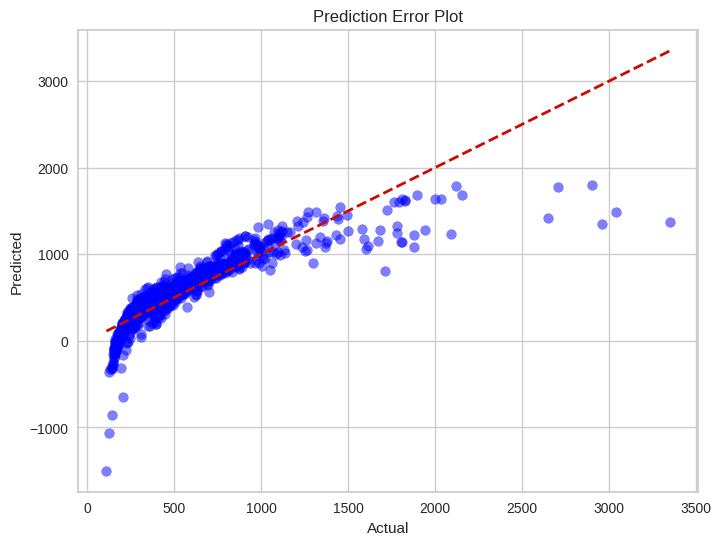

In [398]:
plt.figure(figsize=(8, 6))
plt.scatter(y_rg_val, y_pred, alpha=0.5, color='blue')
plt.plot([y_rg_val.min(), y_rg_val.max()], [y_rg_val.min(), y_rg_val.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Prediction Error Plot")
plt.show()

In [399]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_rg_val, y_pred)
mse = mean_squared_error(y_rg_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_rg_val, y_pred)

print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Evaluation Metrics:
MAE: 106.63
MSE: 33510.57
RMSE: 183.06
R²: 0.7500


Berdasarkan **prediction error plot** dan pipeline yang digunakan, berikut adalah analisis terkait pemilihan **MinMaxScaler** dan **Ridge Regression** dalam meningkatkan performa model:

1. Penggunaan **MinMaxScaler** dalam pipeline ini dipilih, karena data yang memiliki skala yang berbeda-beda. MinMaxScaler menormalkan fitur ke dalam rentang [0,1], yang memastikan bahwa semua fitur berkontribusi secara proporsional dalam pelatihan model. Hal ini sangat berguna ketika ada fitur dengan skala besar yang dapat mendominasi model. Dengan menormalkan fitur, model tidak akan terpengaruh oleh perbedaan skala antara fitur, sehingga setiap fitur memiliki pengaruh yang lebih seimbang. Oleh karena itu, menggunakan MinMaxScaler dipilih untuk menghindari bias yang dapat terjadi ketika fitur dengan skala yang lebih besar lebih mempengaruhi pembelajaran model.

2. **Ridge Regression** dipilih karena kemampuannya untuk menangani   
   **multikolinearitas** dan **overfitting**. Dengan menambahkan **regularisasi L2**, Ridge Regression menarik koefisien regresi menuju nol, yang mengurangi varians dan meningkatkan stabilitas model. Regularisasi ini juga membantu menghindari estimasi koefisien yang tidak stabil akibat kolinearitas antar fitur.

  Pemilihan **alpha=0.5** didasarkan pada hasil yang lebih optimal dibandingkan dengan alpha 0.1 dan 1. Nilai alpha ini memberikan keseimbangan yang lebih baik antara  **underfitting** dan **overfitting**, sehingga memungkinkan model untuk menangkap pola data lebih baik tanpa terlalu sensitif terhadap noise.

  
Berdasarkan nilai **R²**, model dengan MinMaxScaler dan Ridge Regression menunjukkan performa yang lebih baik dibandingkan menggunakan **StandardScaler** dan **RobustScaler**.

Referensi:  
* https://www.geeksforgeeks.org/what-is-ridge-regression/
* https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works

#### Predict data test

In [400]:
df_test_rr = pd.read_csv("/content/test_csl_reg_x.csv")

id_test = df_test_rr['id'].copy()
df_test_rr.drop(["id", "user_id"], axis=1, inplace=True)

##### Handle Missing Values

In [401]:
# Cek missing values awal
print("Missing values before:")
print(df_test_rr.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_name                 0
user_weight_category    39
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
gender                   0
dtype: int64


In [402]:
mode_value = df_test_rr['user_weight_category'].mode()[0]
df_test_rr['user_weight_category'] = df_test_rr['user_weight_category'].fillna(mode_value)

##### Encode Data

In [403]:
df_test_rr = pd.get_dummies(df_test_rr, columns=['smt_name'])
df_test_rr.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,...,gender,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,25 to 34,2018-07-15,33,36.9,65 to 74 kg,Night Ride,34.6,50.8,41.61,4326,...,male,False,False,False,False,False,False,True,False,False
1,25 to 34,2018-01-03,181,26.2,75 to 84 kg,احلى تمرين مع دراج جدة two hearts person bikin...,25.4,40.3,45.37,6427,...,male,False,False,False,False,False,False,False,False,True
2,25 to 34,2019-07-19,3,56.0,54 kg and under,Afternoon Ride,22.6,85.3,78.45,12507,...,male,False,False,False,False,False,True,False,False,False
3,45 to 54,2018-06-22,142,11.1,75 to 84 kg,Morning Ride,12.1,16.9,21.01,6254,...,male,False,False,False,True,False,False,False,False,False
4,35 to 44,2018-08-29,216,22.2,85 to 95 kg,تمرين جميل مع دراج جدة red heart,21.9,45.7,57.15,9398,...,male,False,False,False,False,False,False,False,False,True


In [404]:
df_test_rr['gender'] = df_test_rr['gender'].map({'female': 1, 'male':2})
df_test_rr.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,...,gender,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,25 to 34,2018-07-15,33,36.9,65 to 74 kg,Night Ride,34.6,50.8,41.61,4326,...,2,False,False,False,False,False,False,True,False,False
1,25 to 34,2018-01-03,181,26.2,75 to 84 kg,احلى تمرين مع دراج جدة two hearts person bikin...,25.4,40.3,45.37,6427,...,2,False,False,False,False,False,False,False,False,True
2,25 to 34,2019-07-19,3,56.0,54 kg and under,Afternoon Ride,22.6,85.3,78.45,12507,...,2,False,False,False,False,False,True,False,False,False
3,45 to 54,2018-06-22,142,11.1,75 to 84 kg,Morning Ride,12.1,16.9,21.01,6254,...,2,False,False,False,True,False,False,False,False,False
4,35 to 44,2018-08-29,216,22.2,85 to 95 kg,تمرين جميل مع دراج جدة red heart,21.9,45.7,57.15,9398,...,2,False,False,False,False,False,False,False,False,True


In [405]:
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
df_test_rr['user_age_group'] = df_test_rr['user_age_group'].map(age_mapping)
df_test_rr.head()

,user_age_group,attempt_date,smt_rank,smt_avg_spd,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,act_moving_seconds,...,gender,smt_name_Al Fardoos to shellfish round about,smt_name_Headquarters Business Park,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid
0,2,2018-07-15,33,36.9,65 to 74 kg,Night Ride,34.6,50.8,41.61,4326,...,2,False,False,False,False,False,False,True,False,False
1,2,2018-01-03,181,26.2,75 to 84 kg,احلى تمرين مع دراج جدة two hearts person bikin...,25.4,40.3,45.37,6427,...,2,False,False,False,False,False,False,False,False,True
2,2,2019-07-19,3,56.0,54 kg and under,Afternoon Ride,22.6,85.3,78.45,12507,...,2,False,False,False,False,False,True,False,False,False
3,4,2018-06-22,142,11.1,75 to 84 kg,Morning Ride,12.1,16.9,21.01,6254,...,2,False,False,False,True,False,False,False,False,False
4,3,2018-08-29,216,22.2,85 to 95 kg,تمرين جميل مع دراج جدة red heart,21.9,45.7,57.15,9398,...,2,False,False,False,False,False,False,False,False,True


In [406]:
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
df_test_rr['user_weight_category'] = df_test_rr['user_weight_category'].map(weight_mapping)

In [407]:
freq_map = df_test_rr['act_title'].value_counts(normalize=True)
df_test_rr['act_title'] = df_test_rr['act_title'].map(freq_map)

In [408]:
df_test_rr['attempt_date'] = pd.to_datetime(df_test_rr['attempt_date'])
df_test_rr['attempt_year'] = df_test_rr['attempt_date'].dt.year
df_test_rr['attempt_month'] = df_test_rr['attempt_date'].dt.month
df_test_rr['attempt_day'] = df_test_rr['attempt_date'].dt.day
df_test_rr = df_test_rr.drop('attempt_date', axis=1)

In [409]:
df_test_rr.isnull().sum()

,0
user_age_group,0
smt_rank,0
smt_avg_spd,0
user_weight_category,0
act_title,0
act_avg_spd,0
act_max_spd,0
act_total_km,0
act_moving_seconds,0
act_total_seconds,0


#### Predict data test

In [410]:
test_predictions_rr = pipeline_rr.predict(df_test_rr[X_rg_train.columns])

#Buat file submission

submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'smt_finish_seconds': test_predictions_rr
})

submission.to_csv('submission_RR.csv', index=False)
submission.head()

,id,smt_finish_seconds
0,2699,148.251116
1,332,624.485375
2,3282,-502.462159
3,5891,1229.513157
4,858,752.338419


# Clustering

## K-Means dengan Silhoutte Method

#### Pemilihan fitur

In [411]:
df_cluster = df_dt.copy()
df_cluster.head()

,user_age_group,gender,smt_rank,smt_avg_spd,smt_finish_seconds,user_weight_category,act_title,act_avg_spd,act_max_spd,act_total_km,...,smt_name_King Street side,smt_name_North Corniche,smt_name_Obhur North Short,smt_name_Oghor 2 SailsIsland,smt_name_PRINCE SULTAN - ASSALAM TO FATIMA,smt_name_S.Ubhur Alkurnaysh South Bound with detour,smt_name_Starbucks to Majid,attempt_year,attempt_month,attempt_day
0,2,2,712,15.8,382,0,0.132072,13.6,34.9,19.24,...,False,False,False,False,False,False,False,2017,12,22
1,2,2,189,33.2,216,6,0.132072,21.5,43.2,23.47,...,False,False,False,True,False,False,False,2015,4,13
2,2,2,264,23.7,593,3,0.281310,26.7,92.9,38.23,...,False,False,False,False,False,False,True,2018,2,7
3,2,2,50,33.4,817,3,0.092498,31.4,54.4,65.77,...,False,False,False,False,False,False,False,2018,8,24
4,2,1,19,21.3,284,0,0.000477,19.9,43.2,96.53,...,False,False,False,False,False,False,False,2020,3,6


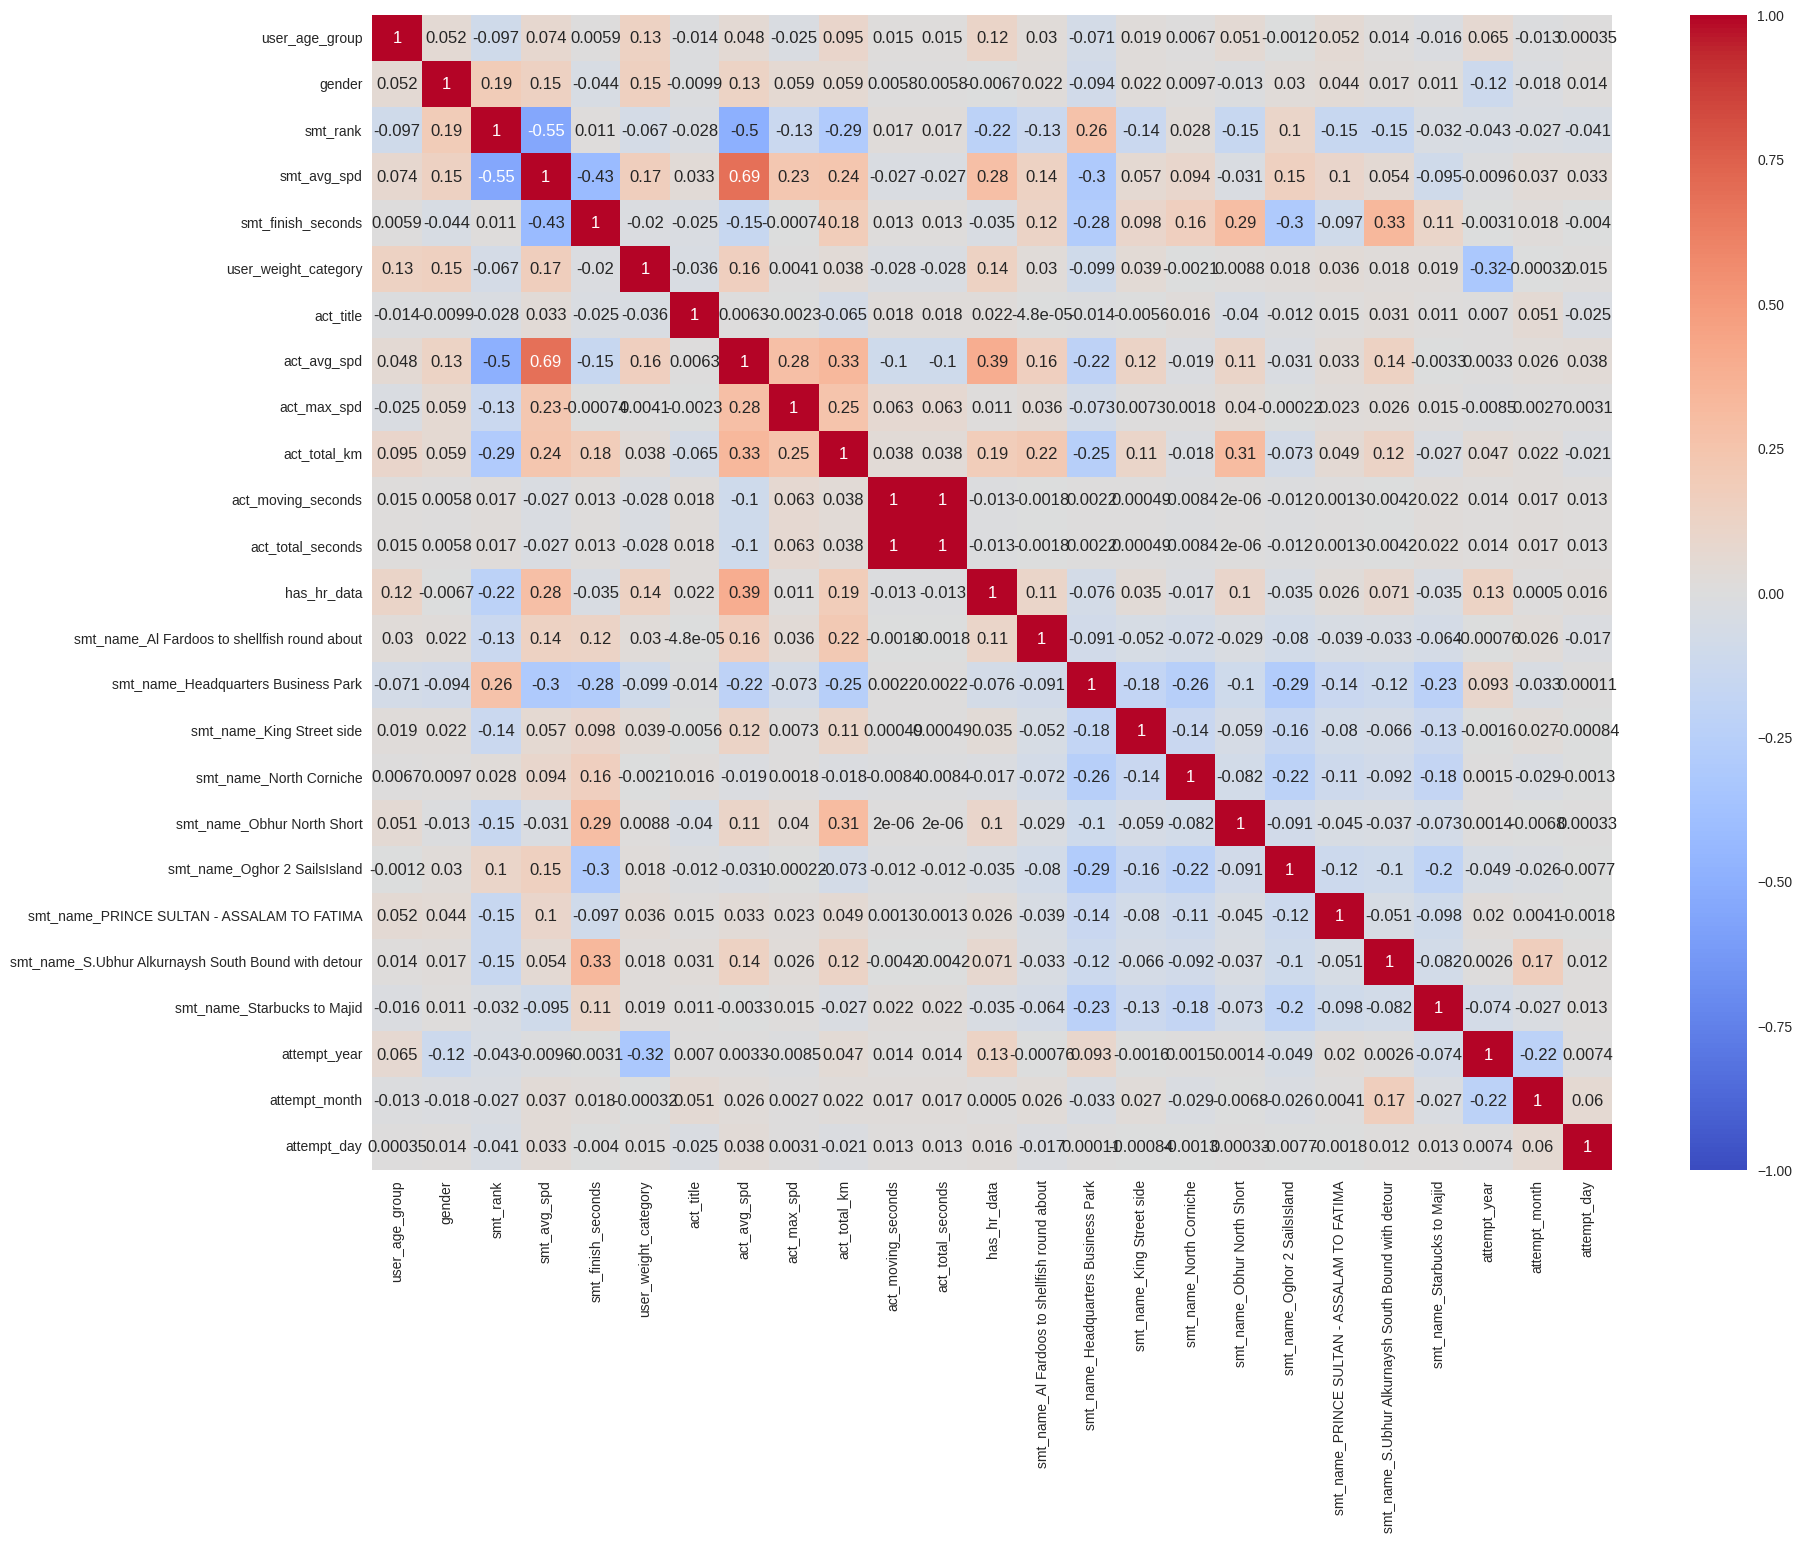

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_cluster.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [413]:
new_df_clustered = df_cluster[['user_weight_category', 'smt_rank', 'act_total_km']]

Pemilihan fitur `user_weight_category`, `smt_rank`, dan `act_total_km` untuk clustering karena beberapa hal berikut :
* Ketiga fitur ini memiliki korelasi yang rendah satu sama lain, yang terlihat dari nilai korelasi yang cukup rendah dengan rincian sebagai berikut. `user_weight_category` dengan smt_rank (-0.067), `user_weight_category` dengan `act_total_km` (0.038), dan `smt_rank` dengan `act_total_km` (-0.29). Korelasi rendah ini menunjukkan bahwa fitur-fitur tersebut memberikan informasi yang unik, yang penting untuk menghindari redundansi dalam hasil clustering.
* Masing-masing fitur merepresentasikan aspek yang berbeda dari peserta. Fitur `user_weight_category` menggambarkan kondisi fisik peserta, `smt_rank menggambarkan performa atau kemampuan`, dan `act_total_km` merepresentasikan kapasitas bersepeda atau endurance peserta.
* ketiga fitur ini memberikan data yang bermakna dalam mengelompokkan pesepeda berdasarkan kondisi fisik, kemampuan, dan kapasitas bersepeda, yang membuat segmentasi lebih relevan.
* Pemilihan fitur ini menghindari penggunaan fitur yang berkorelasi tinggi seperti smt_avg_spd dengan act_avg_spd (0.69) dan act_moving_seconds dengan act_total_seconds (1.0), yang bisa menyebabkan bias dalam hasil clustering.

#### Hitung dan visualisasi nilai Silhouette Coefficient

In [414]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in [2, 3, 4, 5]:
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)

    # Menghitung silhouette_score untuk mengukur seberapa baik klaster yang terbentuk
    cluster_labels = clusterer.fit_predict(new_df_clustered)
    silhouette_avg = silhouette_score(new_df_clustered, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6625869490953031
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.5911537020228168
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.5434602551365164
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.5023615181130121


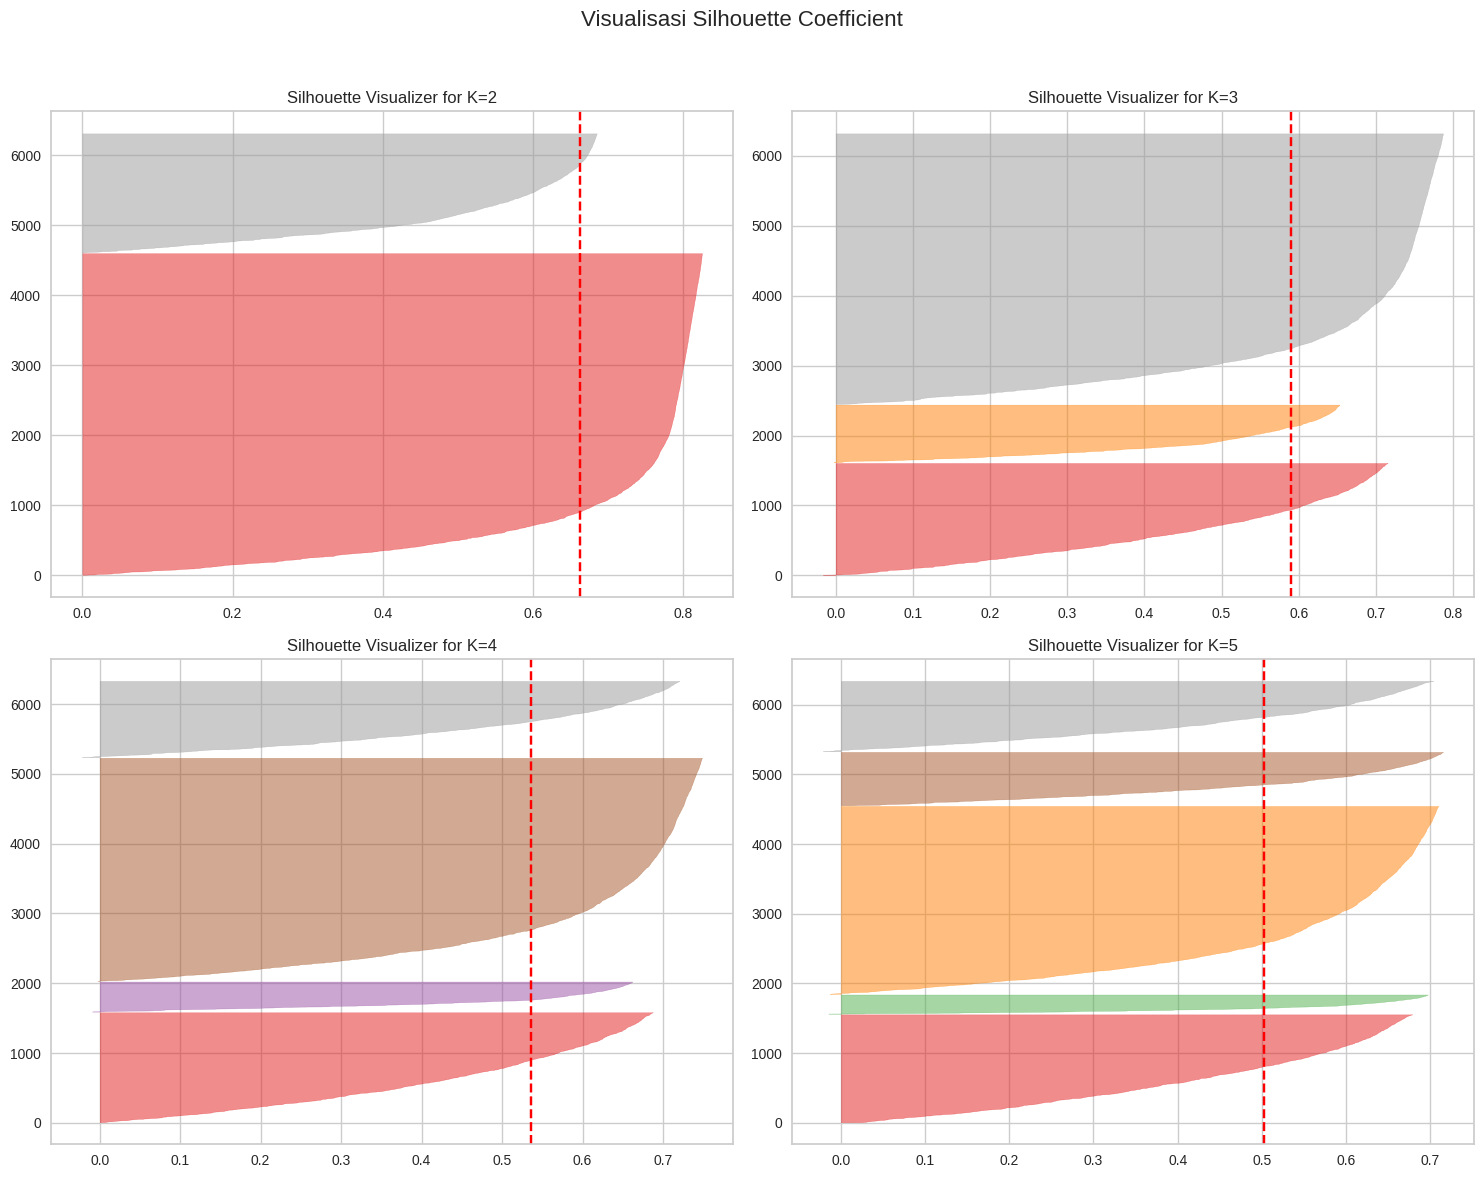

In [415]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Visualisasi Silhouette Coefficient", fontsize=16)

for i, k in enumerate([2, 3, 4, 5]):
    clusterer = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(clusterer, ax=ax[q][mod])
    visualizer.fit(new_df_clustered)
    ax[q][mod].set_title(f"Silhouette Visualizer for K={k}", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


Hasil clustering berdasarkan nilai rata-rata Silhouette Coefficient menunjukkan bahwa \( k = 2 \) adalah jumlah cluster terbaik dengan nilai 0.6626, yang menandakan separasi cluster yang jelas. Untuk \( k = 3 \) hingga \( k = 5 \), nilai Silhouette Coefficient terus menurun (\( 0.5911 \), \( 0.5435 \), \( 0.5024 \)), menunjukkan bahwa peningkatan jumlah cluster mengurangi kualitas separasi. clustering ini dilakukan **tanpa standarisasi data**, karena penggunaan metode seperti Min-Max Scaling, Robust Scaling, maupun Standard Scaling justru menghasilkan nilai Silhouette Coefficient yang jauh lebih rendah dan mengacaukan separasi cluster. Oleh karena itu, disimpulkan bahwa skala asli fitur lebih sesuai untuk pengelompokan.

#### Visualisasi hasil cluster

In [416]:
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(new_df_clustered)

In [417]:
df_with_clusters = pd.DataFrame(new_df_clustered.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.head()

,user_weight_category,smt_rank,act_total_km,cluster
0,0,712,19.24,1
1,6,189,23.47,0
2,3,264,38.23,1
3,3,50,65.77,0
4,0,19,96.53,0


Text(0.5, 0, 'act_total_km')

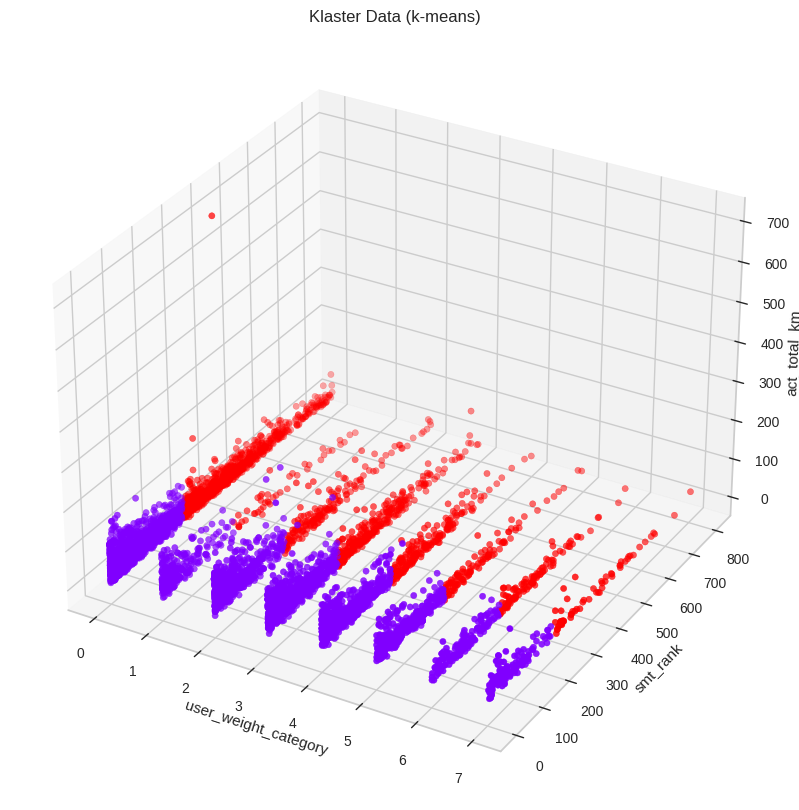

In [418]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['user_weight_category']
y = df_with_clusters['smt_rank']
z = df_with_clusters['act_total_km']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data (k-means)")
plt.grid(False)
ax.set_xlabel('user_weight_category')
ax.set_ylabel('smt_rank')
ax.set_zlabel('act_total_km')

#### Insight

Hasil visualisasi clusterisasi dengan K-Means menunjukkan bahwa **`smt_rank`** menjadi dimensi utama yang memisahkan dua cluster. Cluster merah mengelompokkan pengguna dengan **`smt_rank` rendah**, yang mencerminkan peringkat segmen yang lebih baik, sedangkan cluster ungu mengelompokkan pengguna dengan **`smt_rank` tinggi**, menunjukkan peringkat yang lebih buruk. Pembagian cluster ini jelas terlihat dalam grafik dengan perbedaan signifikan di sepanjang dimensi **`smt_rank`**.

Dalam cluster merah, pengguna mendominasi peringkat terbaik (nilai `smt_rank` kecil), menunjukkan performa unggul di segmen terkait. Sebaliknya, cluster ungu berisi pengguna dengan peringkat yang kurang baik (nilai `smt_rank` besar). Tidak ada indikasi yang jelas bahwa variabel lain, seperti kategori berat badan (`user_weight_category`) atau total jarak aktivitas (`act_total_km`), memengaruhi pembagian cluster secara signifikan dalam visualisasi ini.

Oleh karena itu, clusterisasi ini sepenuhnya mencerminkan distribusi performa berdasarkan variabel **`smr_rank`**, tanpa melibatkan hubungan langsung dengan variabel lainnya.